# Data description

---


In this project, you will use K-means clustering and PCA to perform customer segmentation based on their purchasing behavior in an e-commerce dataset. The goal is to identify distinct groups of customers with similar preferences and behaviors, enabling personalized marketing strategies and recommendations.

Dataset: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Dataset Link: https://archive.ics.uci.edu/ml/datasets/online+retail

1. **InvoiceNo**

   - **Description:** A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
   - **Type:** Categorical
   - **Units:** No
   - **Missing Values:** No

2. **StockCode**

   - **Description:** A 5-digit integral number uniquely assigned to each distinct product.
   - **Type:** Categorical
   - **Units:** No
   - **Missing Values:** No

3. **Description**

   - **Description:** Product name.
   - **Type:** Categorical
   - **Units:** No
   - **Missing Values:** No

4. **Quantity**

   - **Description:** The quantities of each product (item) per transaction.
   - **Type:** Integer
   - **Units:** No
   - **Missing Values:** No

5. **InvoiceDate**

   - **Description:** The day and time when each transaction was generated.
   - **Type:** Date
   - **Units:** No
   - **Missing Values:** No

6. **UnitPrice**

   - **Description:** Product price per unit (in sterling).
   - **Type:** Continuous
   - **Units:** Sterling
   - **Missing Values:** No

7. **CustomerID**

   - **Description:** A 5-digit integral number uniquely assigned to each customer.
   - **Type:** Categorical
   - **Units:** No
   - **Missing Values:** No

8. **Country**
   - **Description:** The name of the country where each customer resides.
   - **Type:** Categorical
   - **Units:** No
   - **Missing Values:** No


# Data undestinding

---


importing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
pd.options.display.max_columns = None
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


From the firest look It's essential to further investigate negative values in Quantity and UnitPrice, as they might indicate data issues, such as returns, cancellations, or errors in recording transactions. Additionally, outliers in both variables should be examined to ensure data integrity and reliability in statistical analysis.


In [6]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


In [7]:
df['CustomerID'].astype('object').describe()

count     406829.0
unique      4372.0
top        17841.0
freq        7983.0
Name: CustomerID, dtype: float64

# Data Cleaning

---


### 1) missing values


In [8]:
df.isna().sum() / len(df) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Description


In [9]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df[df['Description'].isnull()]['CustomerID'].value_counts(dropna=False)

NaN    1454
Name: CustomerID, dtype: int64

In [11]:
df[df['Description'].isnull()]['UnitPrice'].value_counts(dropna=False)

0.0    1454
Name: UnitPrice, dtype: int64

In [12]:
# df[df['Description'].isnull()]['InvoiceDate'].value_counts(dropna=False)

In [13]:
df[df['StockCode'] == 84581]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1823,536544,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom
7105,536988,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-03 15:05:00,3.75,17238.0,United Kingdom
7694,537050,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-05 11:10:00,3.75,14800.0,United Kingdom
13836,537434,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-06 16:57:00,4.21,NaN,United Kingdom
16697,537666,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-07 18:36:00,4.21,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
517398,580054,84581,DOG TOY WITH PINK CROCHET SKIRT,2,2011-12-01 13:08:00,3.75,18122.0,United Kingdom
518666,580115,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2011-12-01 16:22:00,4.13,NaN,United Kingdom
522023,580367,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2011-12-02 16:39:00,4.13,NaN,United Kingdom
524127,580529,84581,DOG TOY WITH PINK CROCHET SKIRT,2,2011-12-04 15:35:00,3.75,14658.0,United Kingdom


We can fill nan in Description columns by description for same product by Stock Code , but we still missing Customer ID and Unit Price and the Quantity values don't make sense in many columns.
so i think the best solution is drop rows with description = NAN


In [14]:
df = df[~df['Description'].isnull()]

In [15]:
df.isna().sum() / len(df) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.724723
Country         0.000000
dtype: float64

CustomerID


In [16]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [17]:
df[df['InvoiceNo'] == 536544]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1965,536544,21721,CANDY SHOP STICKER SHEET,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1966,536544,21722,SWEET PUDDING STICKER SHEET,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,2010-12-01 14:32:00,3.36,NaN,United Kingdom
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,2010-12-01 14:32:00,12.72,NaN,United Kingdom


In [18]:
df[df['InvoiceNo'] == 581498]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541323,581498,15056bl,EDWARDIAN PARASOL BLACK,2,2011-12-09 10:26:00,12.46,NaN,United Kingdom
541324,581498,20669,RED HEART LUGGAGE TAG,3,2011-12-09 10:26:00,2.46,NaN,United Kingdom
541325,581498,20679,EDWARDIAN PARASOL RED,5,2011-12-09 10:26:00,12.46,NaN,United Kingdom
541326,581498,20712,JUMBO BAG WOODLAND ANIMALS,3,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541327,581498,20713,JUMBO BAG OWLS,8,2011-12-09 10:26:00,4.13,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


we need to check if InvoiceNo have only 1 customer ID?


In [19]:
df['InvoiceNo'].value_counts(dropna=False)

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C549545       1
C549565       1
C549580       1
573309        1
C559309       1
Name: InvoiceNo, Length: 24446, dtype: int64

In [20]:
df.groupby('InvoiceNo')['CustomerID'].value_counts(
).sort_values(ascending=False).head(20)

InvoiceNo  CustomerID
576339     14096.0       542
579196     14096.0       533
580727     14096.0       529
578270     14096.0       442
573576     14096.0       435
567656     14096.0       421
567183     14769.0       399
575607     14096.0       377
571441     14096.0       364
570488     14096.0       353
572552     14096.0       352
568346     14096.0       335
547063     14769.0       294
569246     14096.0       285
562031     16984.0       277
554098     14769.0       264
543040     17337.0       259
570672     12536.0       259
569897     17813.0       239
572103     17571.0       223
Name: CustomerID, dtype: int64

In [21]:
df[(df['InvoiceNo'] == 576339) & (df['CustomerID'] != 14096)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [22]:
df[(df['InvoiceNo'] == 579196) & (df['CustomerID'] != 14096.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
df.groupby('InvoiceNo')['CustomerID'].value_counts(
    dropna=False).sort_values(ascending=False).head(400)

InvoiceNo  CustomerID
573585     NaN           1114
581219     NaN            749
581492     NaN            731
580729     NaN            721
558475     NaN            705
                         ... 
556243     NaN            153
546892     NaN            153
550986     NaN            153
562114     NaN            152
571061     NaN            152
Name: CustomerID, Length: 400, dtype: int64

We have concluded that a single customer can submit multiple invoices but one invoice contains a single customer ID.

So, we can create customer ID if NAN value is through invoice number.


In [24]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [25]:
df.loc[df['CustomerID'].isna(), 'CustomerID'] = 'g-' + \
    (df['InvoiceNo'].astype(str).str[:6])

In [26]:
df[df['InvoiceNo'] == 536544]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,g-536544,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,g-536544,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,g-536544,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,g-536544,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,g-536544,United Kingdom
...,...,...,...,...,...,...,...,...
1965,536544,21721,CANDY SHOP STICKER SHEET,1,2010-12-01 14:32:00,1.66,g-536544,United Kingdom
1966,536544,21722,SWEET PUDDING STICKER SHEET,1,2010-12-01 14:32:00,1.66,g-536544,United Kingdom
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,2010-12-01 14:32:00,3.36,g-536544,United Kingdom
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,2010-12-01 14:32:00,12.72,g-536544,United Kingdom


In [27]:
df['CustomerID'].value_counts().head(20)

17841.0     7983
14911.0     5903
14096.0     5128
12748.0     4642
14606.0     2782
15311.0     2491
14646.0     2085
13089.0     1857
13263.0     1677
14298.0     1640
15039.0     1508
14156.0     1420
18118.0     1284
14159.0     1212
14796.0     1165
15005.0     1160
16033.0     1152
14056.0     1128
g-573585    1114
14769.0     1094
Name: CustomerID, dtype: int64

In [28]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Done


### 2) correct data types


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 53.2+ MB


All data types are correct


### 3)check for duplication


In [30]:
df = df[~df.duplicated()]

### 4)Outliers


In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,535187.0,9.671593,219.059056,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,535187.0,4.645242,97.364810,-11062.06,1.25,2.08,4.13,38970.0


<Axes: >

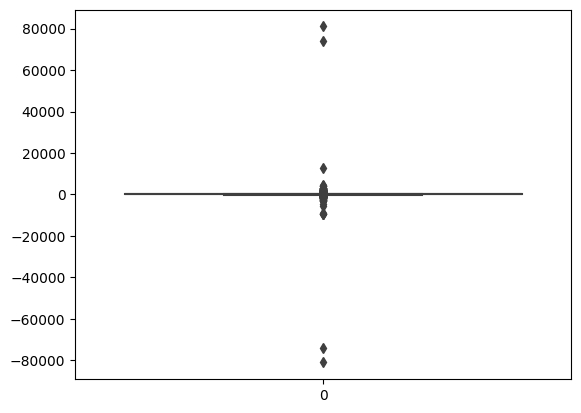

In [33]:
sns.boxplot(df['Quantity'])

<Axes: >

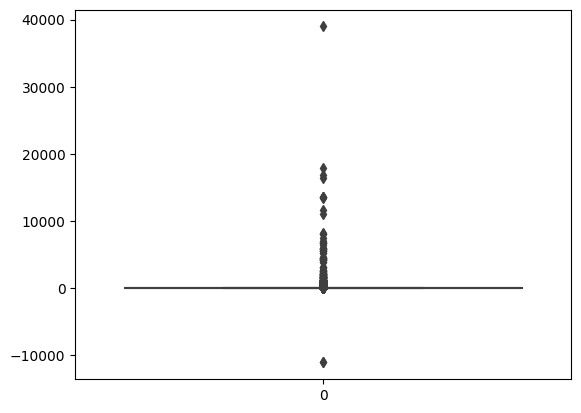

In [34]:
sns.boxplot(df['UnitPrice'])

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

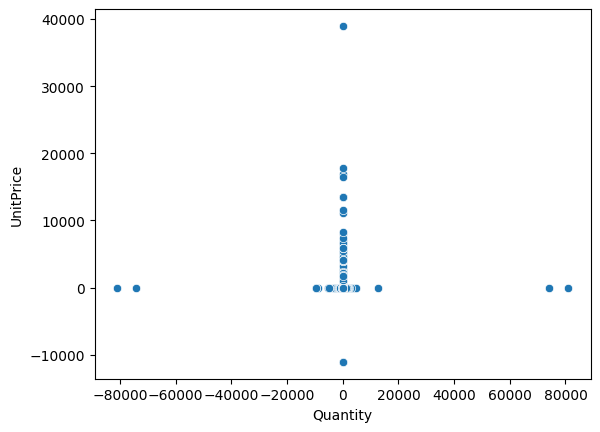

In [35]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')

In [36]:
q1_quan_custom = df['Quantity'].quantile(0.25)
q3_quan_custom = df['Quantity'].quantile(0.75)
iqr_quan_custom = q3_quan_custom - q1_quan_custom
H_q = q3_quan_custom + (1.5 * iqr_quan_custom)
L_q = q1_quan_custom - (1.5 * iqr_quan_custom)

q1_unit_custom = df['UnitPrice'].quantile(0.25)
q3_unit_custom = df['UnitPrice'].quantile(0.75)
iqr_unit_custom = q3_unit_custom - q1_unit_custom

In [37]:
L_q

-12.5

In [38]:
df[(df['Quantity'] < L_q) | (df['Quantity'] > H_q)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom


If we use IQr for removing outliers we will missed 58619 row of data and a think it is a huge number and a lot of information.

so we can go deeper to understand those outliers


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

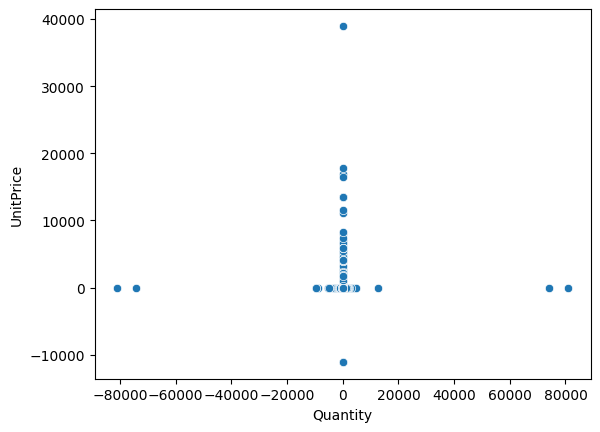

In [39]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')

In [40]:
df[((df['Quantity'] > 60000) | (df['Quantity'] < -60000))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


we know the 'C' in Invoice Number mean the order is canslusion so i guess the customer make this order by mistake and then he cancelled it


In [41]:
df = df[~((df['Quantity'] > 60000) | (df['Quantity'] < -60000))]

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

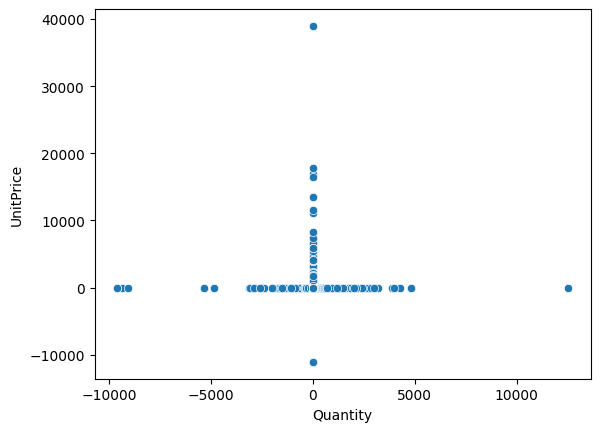

In [42]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')

<Axes: >

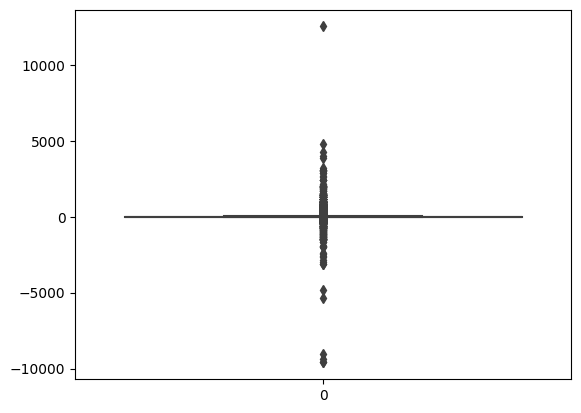

In [43]:
sns.boxplot(df['Quantity'])

In [44]:
df[((df['Quantity'] > 3000) | (df['Quantity'] < -3000))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,g-546152,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,g-556231,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,g-556687,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,g-556690,United Kingdom


In [45]:
df = df[~((df['Quantity'] > 3000) | (df['Quantity'] < -3000))]

In [46]:
df = df[~(df['UnitPrice'] == 0)]

In [47]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

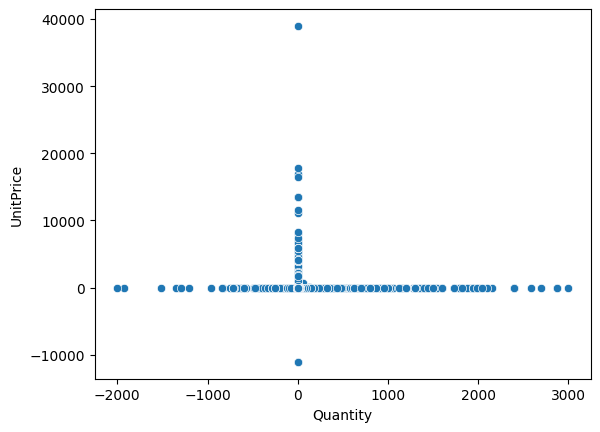

In [48]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')

In [49]:
df = df[~((df['Quantity'] > 3000) | (df['Quantity'] < -3000))]

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

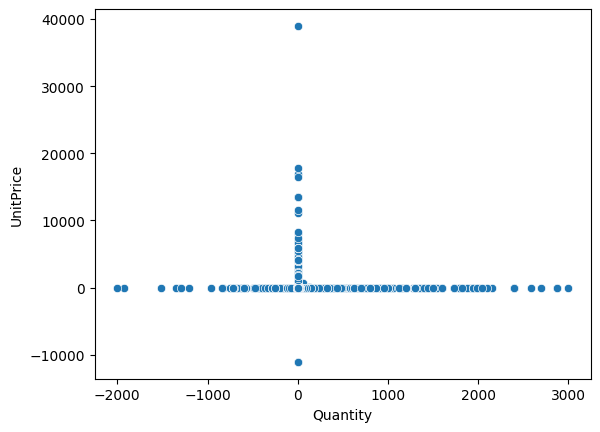

In [50]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')

In [51]:
df = df[~((df['UnitPrice'] > 10000) | (df['UnitPrice'] < 0))]

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

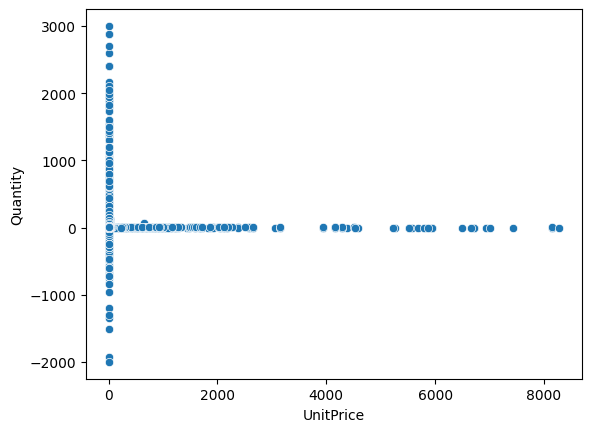

In [52]:
sns.scatterplot(data=df, y='Quantity', x='UnitPrice')

In [53]:
df = df[~(df['UnitPrice'] > 4000)]

In [54]:
df = df[~(df['StockCode'] == 'AMAZONFEE')]

In [55]:
# df[df['StockCode'].str.match(r'^[^\d]', na=False)].head(20)

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

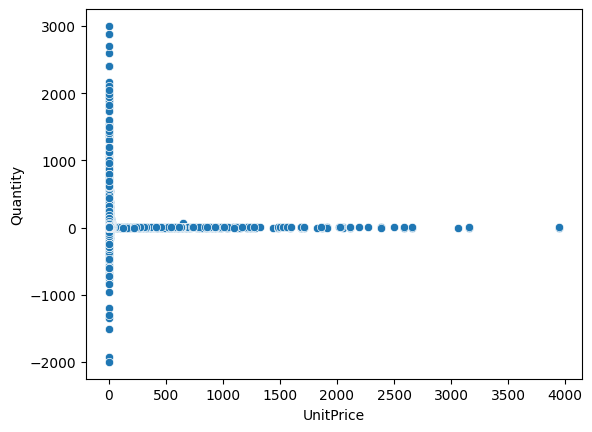

In [56]:
sns.scatterplot(data=df, y='Quantity', x='UnitPrice')

In [57]:
df = df[~(df['UnitPrice'] > 1000)]

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

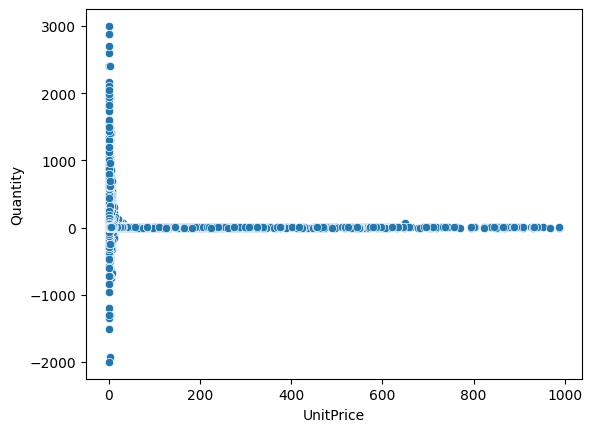

In [58]:
sns.scatterplot(data=df, y='Quantity', x='UnitPrice')

In [59]:
df[(df['UnitPrice'] > 200)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,g-536544,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,g-536592,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.00,13145.0,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,g-536862,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,g-536865,United Kingdom
...,...,...,...,...,...,...,...,...
535003,581179,POST,POSTAGE,1,2011-12-07 15:43:00,240.00,12471.0,Germany
536048,581217,DOT,DOTCOM POSTAGE,1,2011-12-08 09:20:00,863.80,g-581217,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,g-581439,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,g-581492,United Kingdom


In [60]:
df = df[~((df['Quantity'] > 2000) | (df['Quantity'] < -1000))]

In [61]:
# sns.scatterplot(data=df, y=df[~(df['Quantity'] < 0 )]['Quantity'], x='UnitPrice')

In [62]:
df = df[~df['Quantity'] < 0]

the Quantity with (-) mean the order is cancelled


<Axes: xlabel='UnitPrice', ylabel='Quantity'>

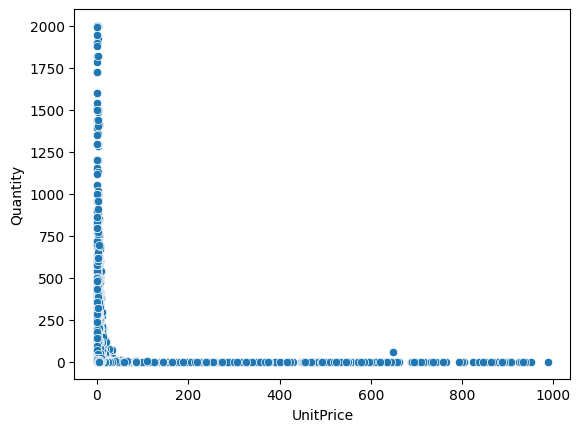

In [63]:
sns.scatterplot(data=df, y='Quantity', x='UnitPrice')

In [64]:
df[df['Quantity'] > 1250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755.0,Japan
19980,537981,22492,MINI PAINT SET VINTAGE,1394,2010-12-09 11:35:00,0.55,17857.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
40060,539721,22616,PACK OF 12 LONDON TISSUES,1296,2010-12-21 13:34:00,0.25,17306.0,United Kingdom
52133,540689,22469,HEART OF WICKER SMALL,1356,2011-01-11 08:43:00,1.93,17450.0,United Kingdom
52134,540689,22470,HEART OF WICKER LARGE,1284,2011-01-11 08:43:00,3.21,17450.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


In [65]:
df = df[~(df['UnitPrice'] > 250)]

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

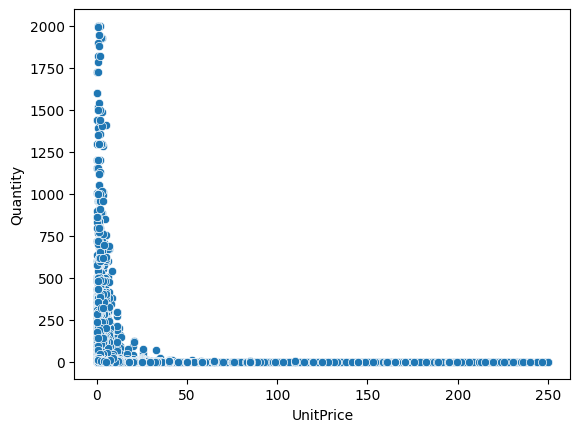

In [66]:
sns.scatterplot(data=df, y='Quantity', x='UnitPrice')

In [67]:
df = df[~(df['UnitPrice'] > 170)]

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

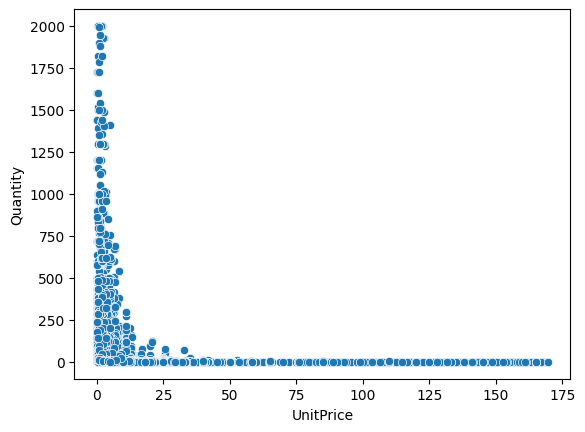

In [68]:
sns.scatterplot(data=df, y='Quantity', x='UnitPrice')

All values are logical now. So we have finished cleaning the data


# Feature Engineering

---


In [69]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [70]:
new_order = ['InvoiceDate', 'InvoiceNo', 'StockCode',
             'CustomerID', 'Country', 'Description', 'Quantity', 'UnitPrice']
df = df[new_order]

In [71]:
df

,InvoiceDate,InvoiceNo,StockCode,CustomerID,Country,Description,Quantity,UnitPrice
0,2010-12-01 08:26:00,536365,85123A,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,2010-12-01 08:26:00,536365,71053,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39
2,2010-12-01 08:26:00,536365,84406B,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,2010-12-01 08:26:00,536365,84029G,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,2010-12-01 08:26:00,536365,84029E,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...,...,...,...,...
541904,2011-12-09 12:50:00,581587,22613,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85
541905,2011-12-09 12:50:00,581587,22899,12680.0,France,CHILDREN'S APRON DOLLY GIRL,6,2.10
541906,2011-12-09 12:50:00,581587,23254,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15
541907,2011-12-09 12:50:00,581587,23255,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15


In [72]:
df['total_Sales'] = df['Quantity'] * df['UnitPrice']

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3630141302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_Sales'] = df['Quantity'] * df['UnitPrice']


In [73]:
df.head()

,InvoiceDate,InvoiceNo,StockCode,CustomerID,Country,Description,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,536365,85123A,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,2010-12-01 08:26:00,536365,71053,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,2010-12-01 08:26:00,536365,84406B,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,2010-12-01 08:26:00,536365,84029G,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,2010-12-01 08:26:00,536365,84029E,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


### Date-related features:

Extract year, month, day, and hour from the 'InvoiceDate'.

Calculate the day of the week for each transaction.


In [74]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3481411920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year
C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3481411920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3481411920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [75]:
df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek']] = df[[
    'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].astype('object')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\4253588517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek']] = df[[


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524348 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  524348 non-null  datetime64[ns]
 1   InvoiceNo    524348 non-null  object        
 2   StockCode    524348 non-null  object        
 3   CustomerID   524348 non-null  object        
 4   Country      524348 non-null  object        
 5   Description  524348 non-null  object        
 6   Quantity     524348 non-null  int64         
 7   UnitPrice    524348 non-null  float64       
 8   total_Sales  524348 non-null  float64       
 9   Year         524348 non-null  object        
 10  Month        524348 non-null  object        
 11  Day          524348 non-null  object        
 12  Hour         524348 non-null  object        
 13  DayOfWeek    524348 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 60.0+ MB


In [77]:
df.head()

,InvoiceDate,InvoiceNo,StockCode,CustomerID,Country,Description,Quantity,UnitPrice,total_Sales,Year,Month,Day,Hour,DayOfWeek
0,2010-12-01 08:26:00,536365,85123A,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,12,1,8,2
1,2010-12-01 08:26:00,536365,71053,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,12,1,8,2
2,2010-12-01 08:26:00,536365,84406B,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,12,1,8,2
3,2010-12-01 08:26:00,536365,84029G,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,12,1,8,2
4,2010-12-01 08:26:00,536365,84029E,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,12,1,8,2


### Customer-related features:

Calculate total spending per customer.


In [78]:
customer_data = df.groupby('CustomerID').agg({
    'total_Sales': 'sum'
}).reset_index()

customer_data.columns = ['CustomerID', 'CustomerTotalSpending']

df = pd.merge(df, customer_data, on='CustomerID', how='left')

Calculate the recency of each transaction by finding the time difference between the transaction date and the most recent transaction date.


In [79]:
df['TimeٍٍSinceLastOrder'] = (df['InvoiceDate'].max() - df['InvoiceDate'])

### Order-related features:

Calculate the average basket size (average quantity of products per Customer)


In [80]:
order_data = df.groupby('CustomerID').agg({
    'Quantity': 'sum'
}).reset_index()

order_data.columns = ['CustomerID', 'CusAvgBasketSize']

df = pd.merge(df, order_data, on='CustomerID', how='left')

In [81]:
df.head()

,InvoiceDate,InvoiceNo,StockCode,CustomerID,Country,Description,Quantity,UnitPrice,total_Sales,Year,Month,Day,Hour,DayOfWeek,CustomerTotalSpending,TimeٍٍSinceLastOrder,CusAvgBasketSize
0,2010-12-01 08:26:00,536365,85123A,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,12,1,8,2,5391.21,373 days 04:24:00,1733
1,2010-12-01 08:26:00,536365,71053,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,12,1,8,2,5391.21,373 days 04:24:00,1733
2,2010-12-01 08:26:00,536365,84406B,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,12,1,8,2,5391.21,373 days 04:24:00,1733
3,2010-12-01 08:26:00,536365,84029G,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,12,1,8,2,5391.21,373 days 04:24:00,1733
4,2010-12-01 08:26:00,536365,84029E,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,12,1,8,2,5391.21,373 days 04:24:00,1733


In [82]:
new_order = ['InvoiceDate', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'InvoiceNo', 'StockCode', 'Description',
             'CustomerID', 'CusAvgBasketSize', 'CustomerTotalSpending', 'TimeٍٍSinceLastOrder', 'Country', 'Quantity', 'UnitPrice', 'total_Sales']
df = df[new_order]

In [83]:
df

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524343,2011-12-09 12:50:00,2011,12,9,12,4,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12680.0,443,862.81,0 days 00:00:00,France,12,0.85,10.20
524344,2011-12-09 12:50:00,2011,12,9,12,4,581587,22899,CHILDREN'S APRON DOLLY GIRL,12680.0,443,862.81,0 days 00:00:00,France,6,2.10,12.60
524345,2011-12-09 12:50:00,2011,12,9,12,4,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12680.0,443,862.81,0 days 00:00:00,France,4,4.15,16.60
524346,2011-12-09 12:50:00,2011,12,9,12,4,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,443,862.81,0 days 00:00:00,France,4,4.15,16.60


### we were create 9 new features:

Year --> order year

Month --> order month

Day --> order month

Hour --> order hour

DayOfWeek --> which day of week (1-7)

CusAvgBasketSize --> average quantity of products per Customer

CustomerTotalSpending --> total customer spending in all orders

TimeٍٍSinceLastOrder --> Calculate the recency of each transaction by finding the time difference between the transaction date and the most recent transaction date.

total_Sales --> Quantity \* unit price


# EDA & visualisation

---


## 1)univariate Analysis


In [84]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373 days 04:24:00,United Kingdom,6,3.39,20.34


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524348 entries, 0 to 524347
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   InvoiceDate            524348 non-null  datetime64[ns] 
 1   Year                   524348 non-null  object         
 2   Month                  524348 non-null  object         
 3   Day                    524348 non-null  object         
 4   Hour                   524348 non-null  object         
 5   DayOfWeek              524348 non-null  object         
 6   InvoiceNo              524348 non-null  object         
 7   StockCode              524348 non-null  object         
 8   Description            524348 non-null  object         
 9   CustomerID             524348 non-null  object         
 10  CusAvgBasketSize       524348 non-null  int64          
 11  CustomerTotalSpending  524348 non-null  float64        
 12  TimeٍٍSinceLastOrder   524348 

note: all date columns will be analysis in Time series analysis section


In [86]:
# from pandas_profiling import ProfileReport

# # Assuming your DataFrame is named 'df'
# profile = ProfileReport(df)
# profile.to_notebook_iframe()

Text(0.5, 1.0, 'Top 10 ordered product')

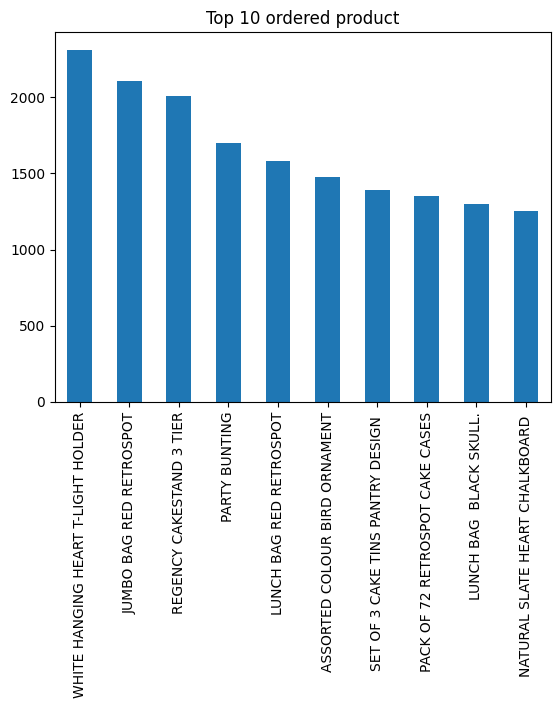

In [87]:
df['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 ordered product')

In [88]:
len(df['CustomerID'].value_counts())

5735

Text(0.5, 1.0, 'Top 10 Custmer')

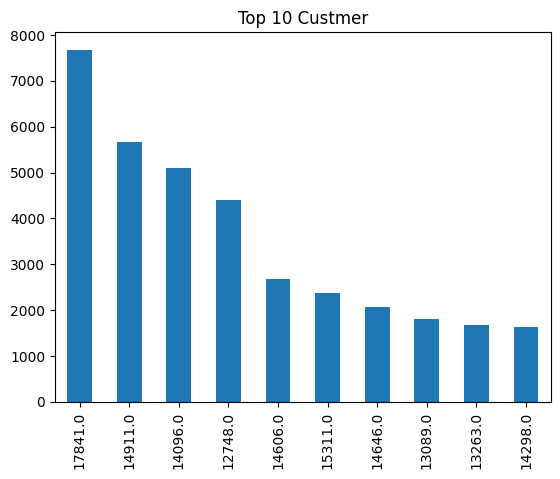

In [89]:
df['CustomerID'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Custmer')

In [90]:
df['TimeٍٍSinceLastOrder'] = df['TimeٍٍSinceLastOrder'].dt.days

In [91]:
days = df['TimeٍٍSinceLastOrder'].value_counts().index

In [92]:
np.array(days).mean()

181.65555555555557

<Axes: >

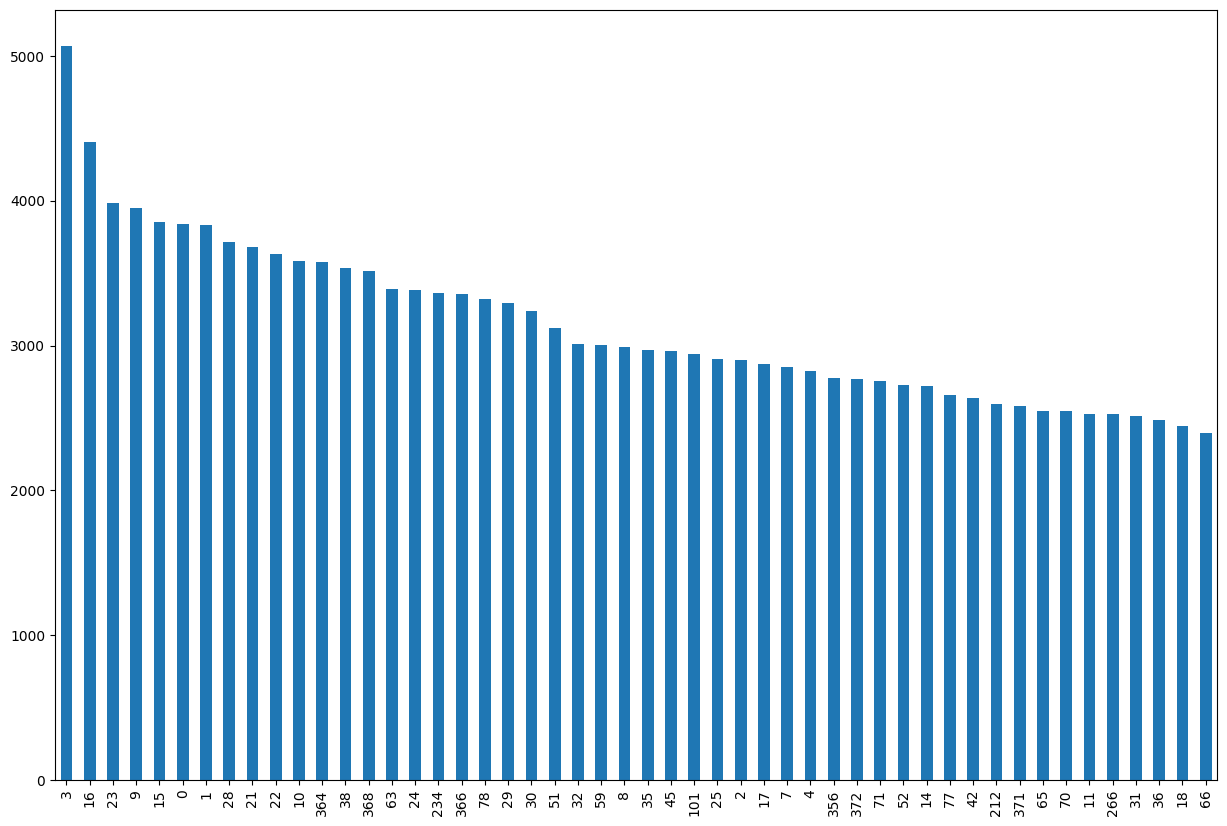

In [93]:
plt.figure(figsize=(15, 10))
df['TimeٍٍSinceLastOrder'].value_counts().head(50).plot(kind='bar')

### first insights:

1-we have 19877 distinct invoice (order)

2-we have 3919 prodect

3-WHITE HANGING HEART T-LIGHT HOLDER is the top product ordered

4-we have 5735 customer during data set time

5-the customer with id 17841 is the top ordering custmer

6-the average reorder time in 181 day and i think this is a long time we need to reduce it

7-the most custmers come from United Kingdom (91.5%) then Germany (1.7%) then France (1.6%)

8-the average Quantity per product is 4 product (we use median because the data still has outliers)

9- the average unit price is 2.08$ (we use median because the data still has outliers)


## 2) Bivariate , multivariate Analysis and questions


In [94]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34


### <span style='color:red'>1- Is there a correlation between the quantity of items ordered and the total sales?</span>


In [95]:
df.corr()['Quantity']

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\713530252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Quantity']


CusAvgBasketSize         0.255891
CustomerTotalSpending    0.257210
TimeٍٍSinceLastOrder    -0.004464
Quantity                 1.000000
UnitPrice               -0.091663
total_Sales              0.658635
Name: Quantity, dtype: float64

<Axes: xlabel='Quantity', ylabel='total_Sales'>

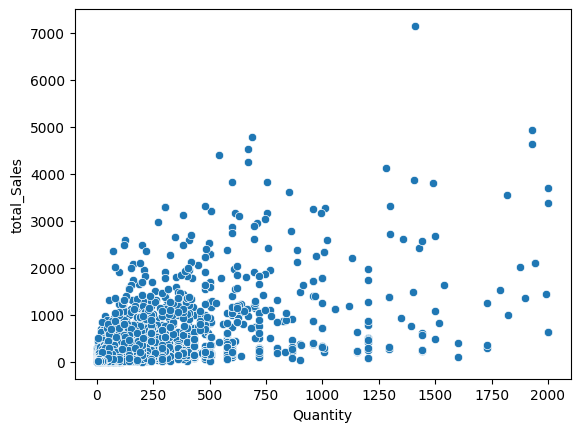

In [96]:
sns.scatterplot(data=df, x='Quantity', y='total_Sales')

Yes there is strong corrolotion (0.66) between quantity and total sales and This makes sense

This suggests that as the quantity of items ordered increases, total sales also tend to increase.


### <span style='color:red'>2- How does the unit price influence the relationship between quantity and total sales?</span>


In [97]:
df[['Quantity', 'UnitPrice', 'total_Sales']].corr()

,Quantity,UnitPrice,total_Sales
Quantity,1.000000,-0.091663,0.658635
UnitPrice,-0.091663,1.000000,0.102058
total_Sales,0.658635,0.102058,1.000000


There is a relatively weak positive correlation of approximately 0.10 between UnitPrice and total_Sales.

This suggests that the unit price has a limited impact on total sales.


<Axes: xlabel='UnitPrice', ylabel='total_Sales'>

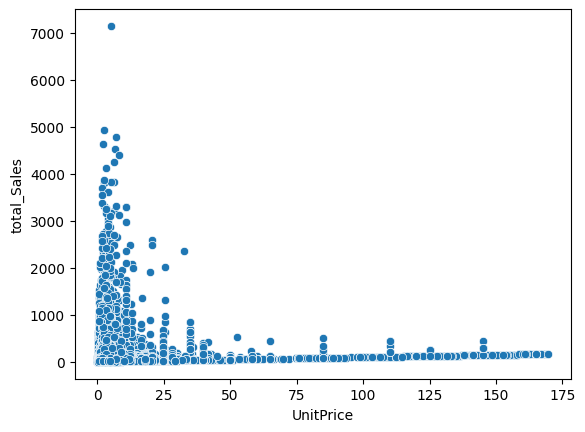

In [98]:
sns.scatterplot(data=df, x='UnitPrice', y='total_Sales')

There is a relatively weak positive correlation of approximately 0.10 between UnitPrice and total_Sales.

This suggests that the unit price has a limited impact on total sales.


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

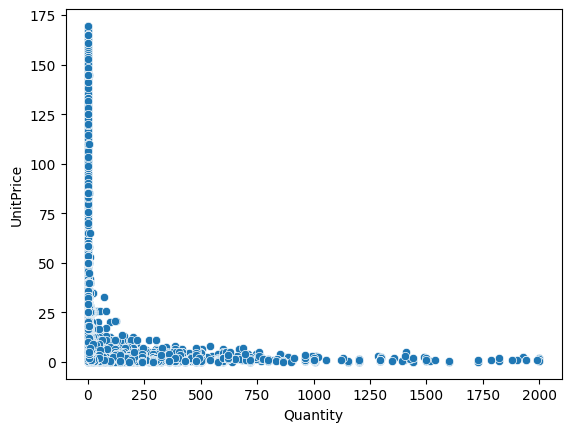

In [99]:
sns.scatterplot(data=df, y='UnitPrice', x='Quantity')

The negative correlation (-0.09) between Quantity and UnitPrice indicates a small inverse relationship.

As the quantity increases, the unit price tends to slightly decrease.


### <span style='color:red'>3- Are there specific customers who contribute significantly to total sales?</span>


In [100]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1453148921.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('CustomerID').sum()['total_Sales'].sort_values(ascending=False).head(20).plot(kind='bar')


<Axes: xlabel='CustomerID'>

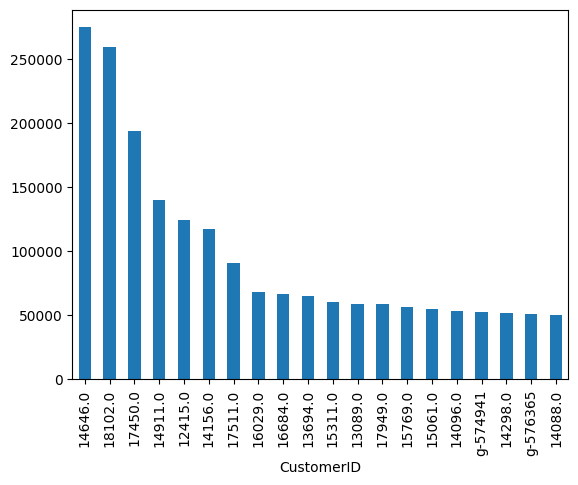

In [101]:
df.groupby('CustomerID').sum()['total_Sales'].sort_values(
    ascending=False).head(20).plot(kind='bar')

In [102]:
# df.groupby('CustomerID').sum()['total_Sales'].sort_values(ascending=False).index

Yes there are about 6 clients (14646.0, 18102.0, 17450.0, 14911.0, 12415.0, 14156.0,
17511.0) contribute significantly to total sales


### <span style='color:red'>4- How does the average basket size correlate with total spending?</span>


In [103]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34


In [104]:
df.corr()['CusAvgBasketSize']

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\2877935405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['CusAvgBasketSize']


CusAvgBasketSize         1.000000
CustomerTotalSpending    0.963441
TimeٍٍSinceLastOrder    -0.014376
Quantity                 0.255891
UnitPrice               -0.024813
total_Sales              0.218487
Name: CusAvgBasketSize, dtype: float64

<Axes: xlabel='CusAvgBasketSize', ylabel='CustomerTotalSpending'>

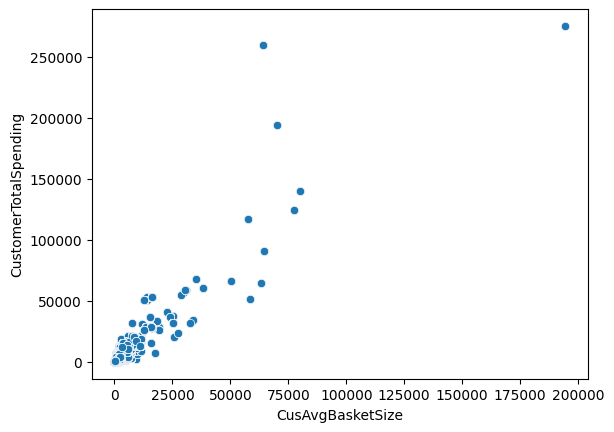

In [105]:
sns.scatterplot(data=df, x='CusAvgBasketSize', y='CustomerTotalSpending')

there is strong + correlation between them (0.963441)


### <span style='color:red'>5- Does customer spending vary significantly between different countries?</span>


In [106]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\2805512174.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').sum()['total_Sales'].sort_values(ascending=False).plot(kind='bar' )


<Axes: xlabel='Country'>

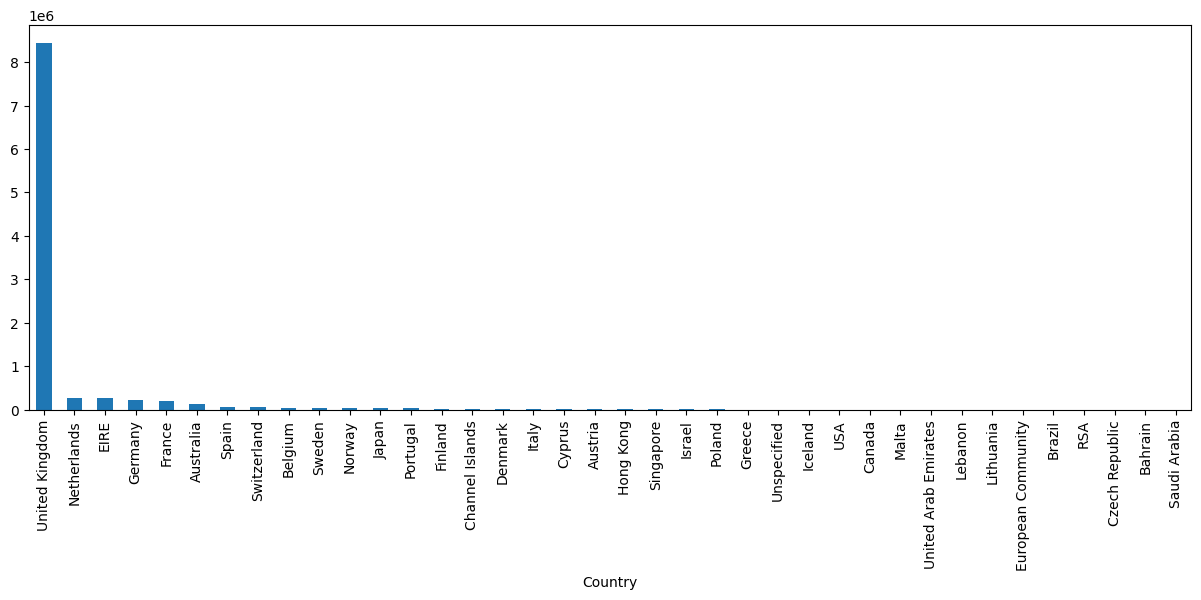

In [107]:
plt.figure(figsize=(15, 5))
df.groupby('Country').sum()['total_Sales'].sort_values(
    ascending=False).plot(kind='bar')

In [108]:
df['total_Sales'].sum()

10026198.484000005

In [109]:
pres = df.groupby('Country').sum()['total_Sales'].sort_values(
    ascending=False).head(10) / df['total_Sales'].sum() * 100

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1740716327.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pres = df.groupby('Country').sum()['total_Sales'].sort_values(ascending=False).head(10) /df['total_Sales'].sum() *100


<Axes: ylabel='total_Sales'>

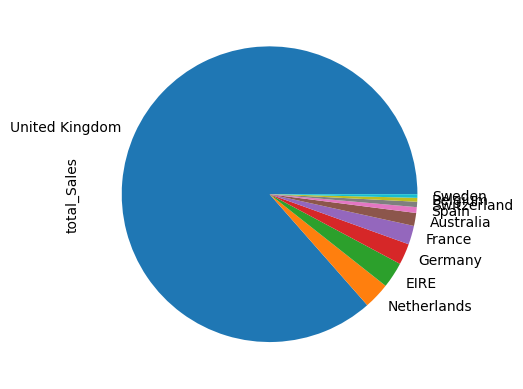

In [110]:
pres.plot(kind='pie')

Yes the customer in US spending vary significantly (84.17%) between different countries then Netherlands (2.79%) then EIRE (2.75%)


### <span style='color:red'>6-Are there specific products that are more popular in certain countries?</span>


In [111]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34


In [112]:
df.groupby('Country')['Description'].value_counts(
).sort_values(ascending=False)

Country         Description                       
United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER    2216
                JUMBO BAG RED RETROSPOT               1954
                REGENCY CAKESTAND 3 TIER              1701
                PARTY BUNTING                         1607
                LUNCH BAG RED RETROSPOT               1409
                                                      ... 
Israel          20 DOLLY PEGS RETROSPOT                  1
                3 HOOK HANGER MAGIC GARDEN               1
                3 HOOK PHOTO SHELF ANTIQUE WHITE         1
                3 TIER SWEETHEART GARDEN SHELF           1
Unspecified     ZINC METAL HEART DECORATION              1
Name: Description, Length: 19935, dtype: int64

In [113]:
product_country_group = df.groupby(['Country', 'Description']).agg(
    {'Quantity': 'sum', 'total_Sales': 'sum'}).reset_index()

In [114]:
product_country_group['Rank_Quantity'] = product_country_group.groupby(
    'Country')['Quantity'].rank(ascending=False, method='dense')
product_country_group['Rank_Sales'] = product_country_group.groupby(
    'Country')['total_Sales'].rank(ascending=False, method='dense')

In [115]:
product_country_group

,Country,Description,Quantity,total_Sales,Rank_Quantity,Rank_Sales
0,Australia,DOLLY GIRL BEAKER,200,216.0,58.0,154.0
1,Australia,I LOVE LONDON MINI BACKPACK,4,16.6,127.0,358.0
2,Australia,10 COLOUR SPACEBOY PEN,48,40.8,107.0,316.0
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.2,25.0,157.0
4,Australia,12 PENCILS TALL TUBE POSY,252,79.8,45.0,265.0
...,...,...,...,...,...,...
19930,Unspecified,WRAP POPPIES DESIGN,25,10.5,13.0,93.0
19931,Unspecified,WRAP SUKI AND FRIENDS,25,10.5,13.0,93.0
19932,Unspecified,WRAP VINTAGE PETALS DESIGN,25,10.5,13.0,93.0
19933,Unspecified,WRAP WEDDING DAY,25,10.5,13.0,93.0


In [116]:
qu = pd.DataFrame(product_country_group.groupby(['Country', 'Description'])[
                  'Quantity'].max().sort_values(ascending=False)).reset_index()

In [117]:
qu_coun = qu.groupby('Country').max().sort_values(
    by='Quantity', ascending=False).reset_index()

In [118]:
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Quantity', y='Description', hue='Country', data=qu_coun)
# plt.title('Most Popular Product by Quantity in Each Country')
# plt.xlabel('Total Quantity')
# plt.ylabel('Product Description')
# plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [119]:
country_of_interest = 'United Kingdom'  # Replace with the desired country
country_data = product_country_group[product_country_group['Country']
                                     == country_of_interest]
country_data

,Country,Description,Quantity,total_Sales,Rank_Quantity,Rank_Sales
15588,United Kingdom,4 PURPLE FLOCK DINNER CANDLES,136,270.40,1581.0,2523.0
15589,United Kingdom,50'S CHRISTMAS GIFT BAG LARGE,1727,2108.63,628.0,897.0
15590,United Kingdom,DOLLY GIRL BEAKER,714,953.00,1111.0,1532.0
15591,United Kingdom,I LOVE LONDON MINI BACKPACK,205,904.57,1513.0,1575.0
15592,United Kingdom,NINE DRAWER OFFICE TIDY,47,729.97,1669.0,1758.0
...,...,...,...,...,...,...
19586,United Kingdom,ZINC T-LIGHT HOLDER STARS SMALL,4453,3717.47,225.0,547.0
19587,United Kingdom,ZINC TOP 2 DOOR WOODEN SHELF,13,270.08,1703.0,2524.0
19588,United Kingdom,ZINC WILLIE WINKIE CANDLE STICK,2297,2222.02,475.0,860.0
19589,United Kingdom,ZINC WIRE KITCHEN ORGANISER,27,208.77,1689.0,2679.0


In [120]:
top_products_quantity = country_data.sort_values(by='Rank_Quantity').head(10)
top_products_sales = country_data.sort_values(by='Rank_Sales').head(10)

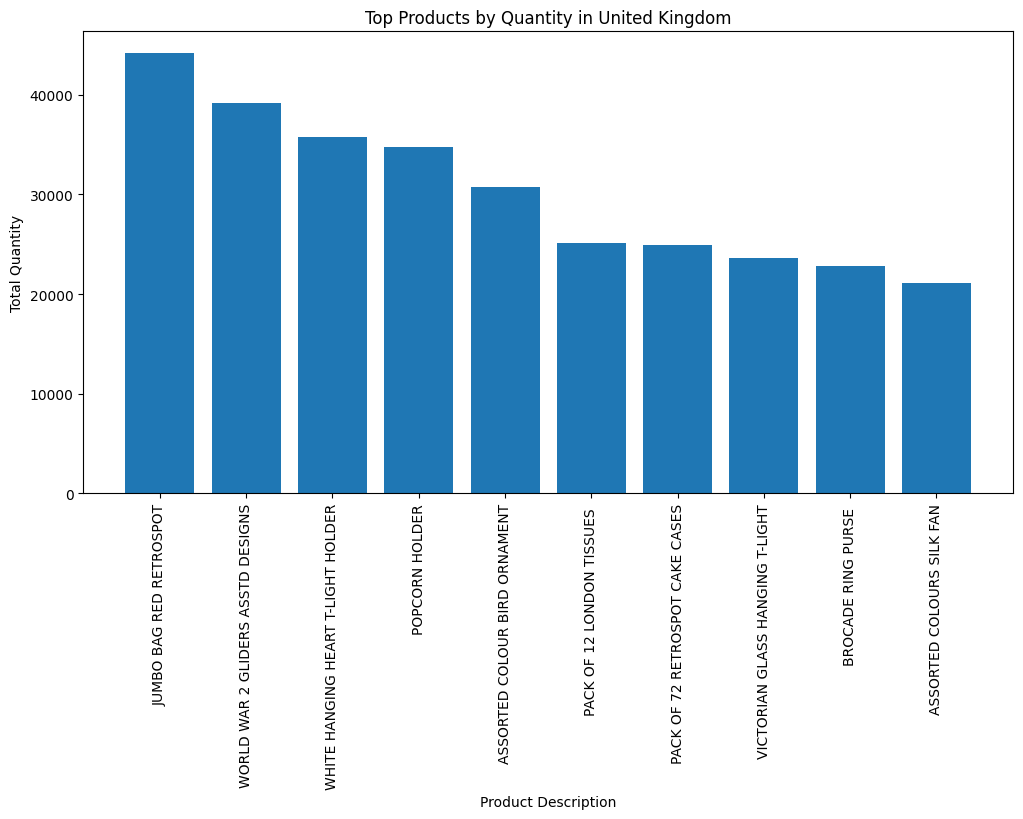

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_products_quantity['Description'],
        top_products_quantity['Quantity'])
plt.title(f'Top Products by Quantity in {country_of_interest}')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

In [122]:
qu_coun

,Country,Description,Quantity
0,United Kingdom,ZINC WIRE SWEETHEART LETTER TRAY,44161
1,Netherlands,ZINC WILLIE WINKIE CANDLE STICK,4528
2,France,ZINC T-LIGHT HOLDER STARS SMALL,4024
3,Australia,YELLOW GIANT GARDEN THERMOMETER,2952
4,Sweden,ZINC WILLIE WINKIE CANDLE STICK,2916
5,EIRE,ZINC WIRE SWEETHEART LETTER TRAY,1800
6,Japan,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1494
7,Germany,ZINC WILLIE WINKIE CANDLE STICK,1221
8,Spain,ZINC T-LIGHT HOLDER STARS SMALL,729
9,Switzerland,ZINC WILLIE WINKIE CANDLE STICK,639


The table above answers this question


### Product Analysis:


### <span style='color:red'>8-Which products have the highest correlation with total sales?</span>


### <span style='color:red'>9-Are there products that show seasonal patterns or popularity based on specific customer segments?</span>


### Geographical Analysis:


### <span style='color:red'>10-Are there differences in purchasing behavior among customers from different countries?</span>


### <span style='color:red'>11-How does the popularity of products vary across countries and regions?</span>


## There are alot of question we can answer them but i think this enough


## 3) correlation Analysis


Investigate if there's a relationship between unit price and quantity sold.
Are there price points at which sales tend to increase or decrease?


In [123]:
df.corr()

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Quantity,UnitPrice,total_Sales
CusAvgBasketSize,1.000000,0.963441,-0.014376,0.255891,-0.024813,0.218487
CustomerTotalSpending,0.963441,1.000000,-0.027245,0.257210,-0.009935,0.273730
TimeٍٍSinceLastOrder,-0.014376,-0.027245,1.000000,-0.004464,0.042323,0.000959
Quantity,0.255891,0.257210,-0.004464,1.000000,-0.091663,0.658635
UnitPrice,-0.024813,-0.009935,0.042323,-0.091663,1.000000,0.102058
total_Sales,0.218487,0.273730,0.000959,0.658635,0.102058,1.000000


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1150832963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

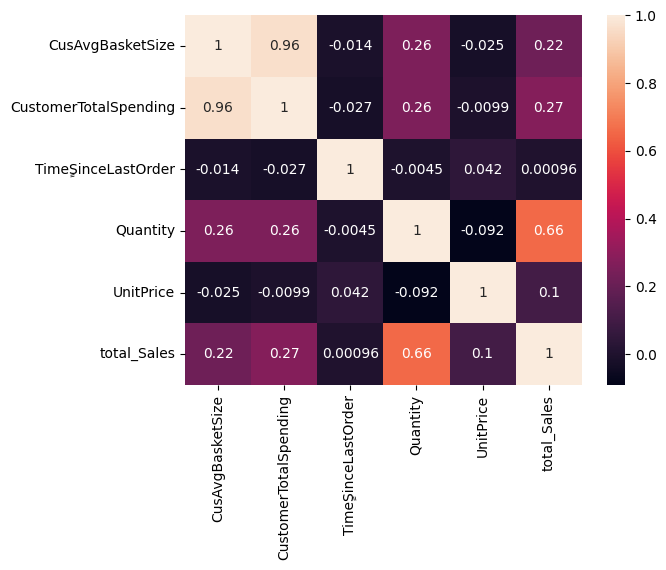

In [124]:
sns.heatmap(df.corr(), annot=True)

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\2223834441.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr() , annot=True)


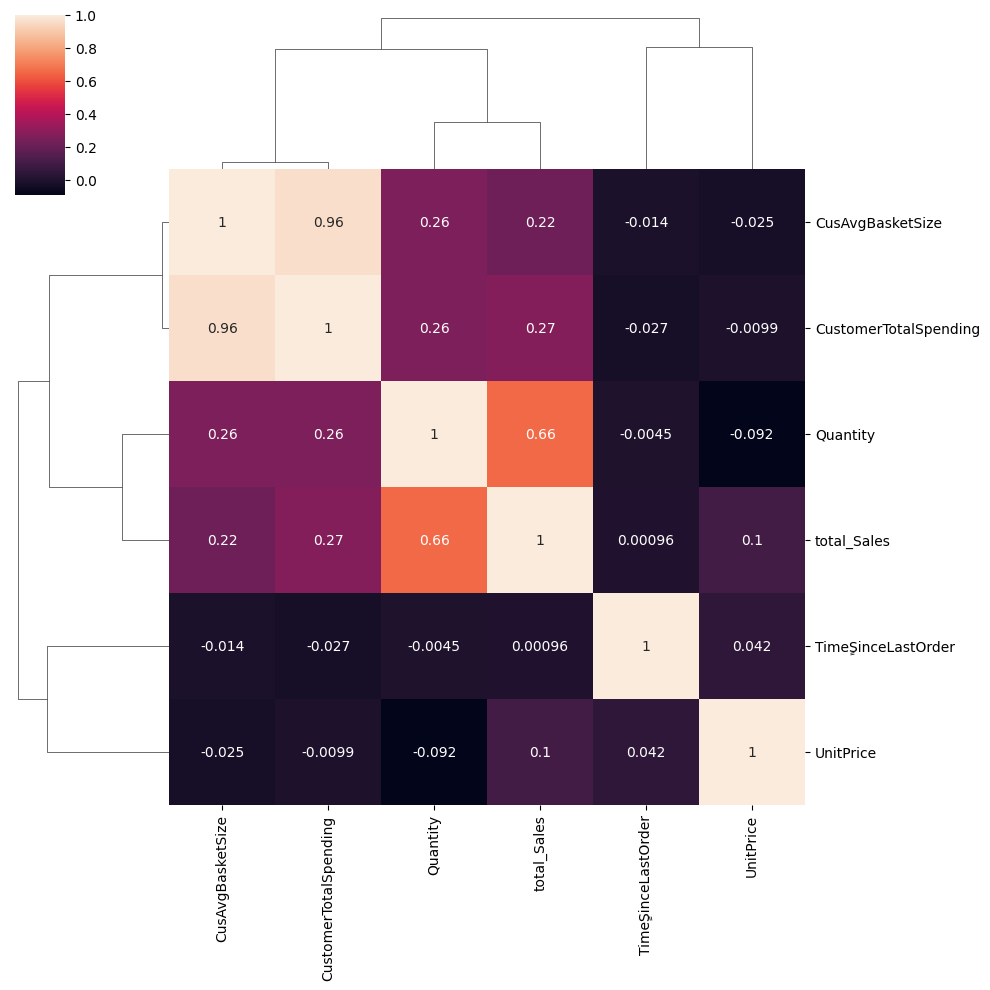

In [125]:
sns.clustermap(df.corr(), annot=True)

### Correlation Coefficients:

1. **CusAvgBasketSize and CustomerTotalSpending:**

   - Correlation Coefficient: 0.9634
   - Interpretation: There is a strong positive correlation (0.9634) between average basket size and total customer spending. This indicates that customers with larger average basket sizes tend to spend more.

2. **CusAvgBasketSize and TimeSinceLastOrder:**

   - Correlation Coefficient: -0.0144
   - Interpretation: There is a very weak negative correlation (-0.0144) between average basket size and the time since the last order. The correlation is close to zero, suggesting a minimal linear relationship.

3. **CusAvgBasketSize and Quantity:**

   - Correlation Coefficient: 0.2559
   - Interpretation: There is a moderate positive correlation (0.2559) between average basket size and the quantity of items ordered. This implies that customers with larger basket sizes tend to purchase more items.

4. **CusAvgBasketSize and UnitPrice:**

   - Correlation Coefficient: -0.0248
   - Interpretation: There is a very weak negative correlation (-0.0248) between average basket size and unit price. The correlation is close to zero, indicating a minimal linear relationship.

5. **CusAvgBasketSize and total_Sales:**
   - Correlation Coefficient: 0.2185
   - Interpretation: There is a moderate positive correlation (0.2185) between average basket size and total sales. Customers with larger average basket sizes contribute positively to total sales.

- **CustomerTotalSpending and total_Sales:**

  - Correlation Coefficient: 0.2737
  - Interpretation: There is a strong positive correlation (0.2737) between total customer spending and total sales. This suggests that customers who spend more contribute significantly to overall sales.

- **Quantity and total_Sales:**

  - Correlation Coefficient: 0.6586
  - Interpretation: There is a strong positive correlation (0.6586) between the quantity of items ordered and total sales. Higher quantities ordered are associated with higher total sales.

- **UnitPrice and total_Sales:**

  - Correlation Coefficient: 0.1021
  - Interpretation: There is a weak positive correlation (0.1021) between unit price and total sales. The correlation suggests a limited impact of unit price on total sales.

- **TimeSinceLastOrder and Quantity:**
  - Correlation Coefficient: -0.0045
  - Interpretation: There is a very weak negative correlation (-0.0045) between the time since the last order and the quantity of items ordered. The correlation is close to zero, indicating a minimal linear relationship.


### 4)Time series analysis


How does total spending vary across different months or days of the week?

Is there a noticeable pattern in customer spending based on the time of day or year?


In [126]:
df.head()

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34


In [127]:
df['InvoiceDate'].dt.strftime('%Y-%m-%d')

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
524343    2011-12-09
524344    2011-12-09
524345    2011-12-09
524346    2011-12-09
524347    2011-12-09
Name: InvoiceDate, Length: 524348, dtype: object

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1111595038.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m-%d')).sum()['total_Sales'].plot(kind='line')


<Axes: xlabel='InvoiceDate'>

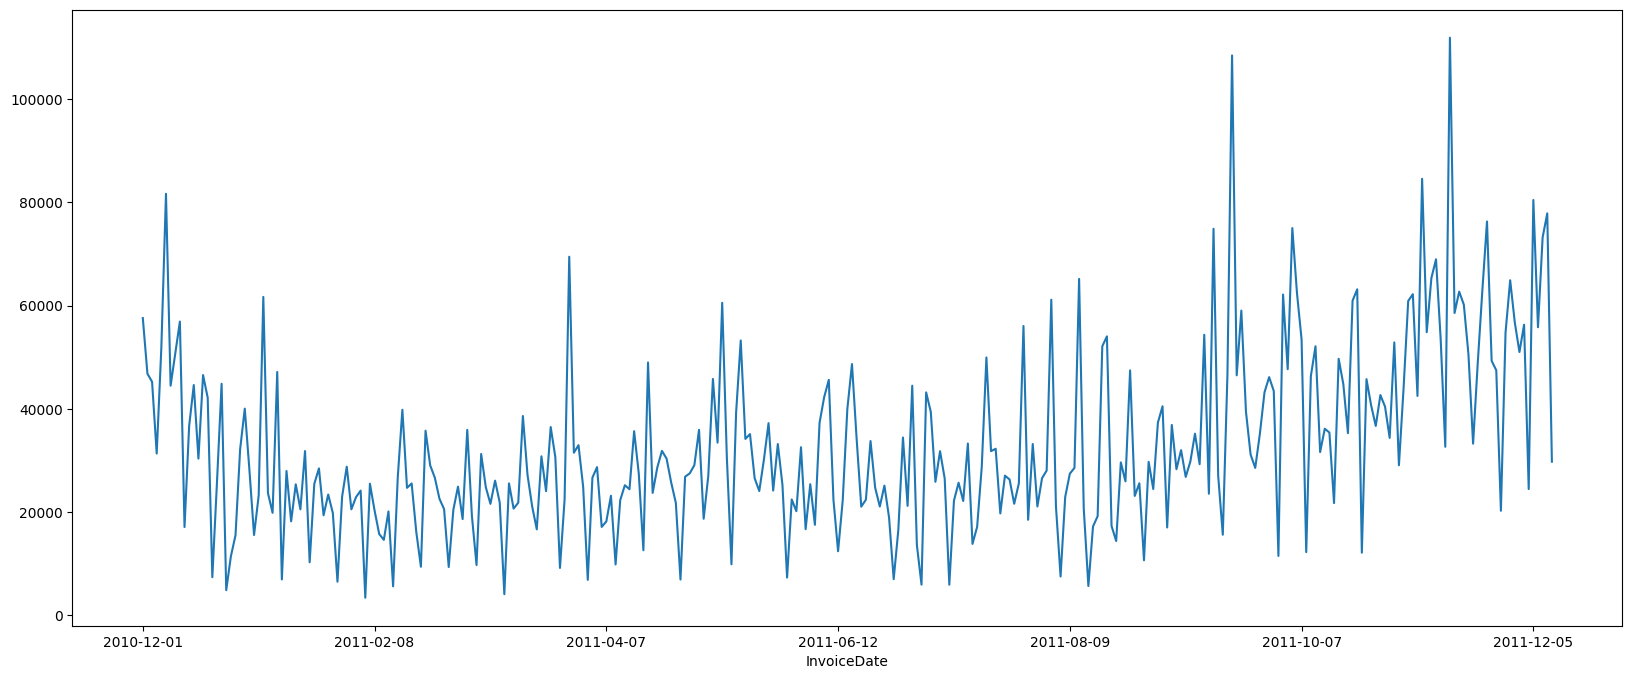

In [128]:
plt.figure(figsize=(20, 8))
df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m-%d')
           ).sum()['total_Sales'].plot(kind='line')

### The first impression is that there is fluctuation in sales, but there is weak growth, which is good


In [129]:
df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m-%d')
           ).sum()['total_Sales'].sort_values()

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\4045639285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m-%d')).sum()['total_Sales'].sort_values()


InvoiceDate
2011-02-06      3439.67
2011-03-13      4117.22
2010-12-22      4901.57
2011-02-13      5645.48
2011-08-14      5701.87
                ...    
2011-12-05     80474.08
2010-12-07     81670.99
2011-11-07     84579.01
2011-09-20    108461.69
2011-11-14    111891.96
Name: total_Sales, Length: 305, dtype: float64

### 2011-11-14 is the most sales day


In [130]:
df['Year'].value_counts()

2011    483406
2010     40942
Name: Year, dtype: int64

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3150957601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').sum()['total_Sales'].plot(kind='bar')


<Axes: xlabel='Year'>

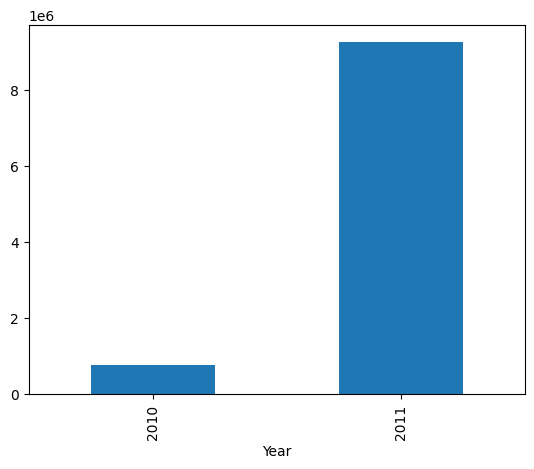

In [131]:
df.groupby('Year').sum()['total_Sales'].plot(kind='bar')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1486964666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').sum()['total_Sales'].plot(kind='line')


<Axes: xlabel='Month'>

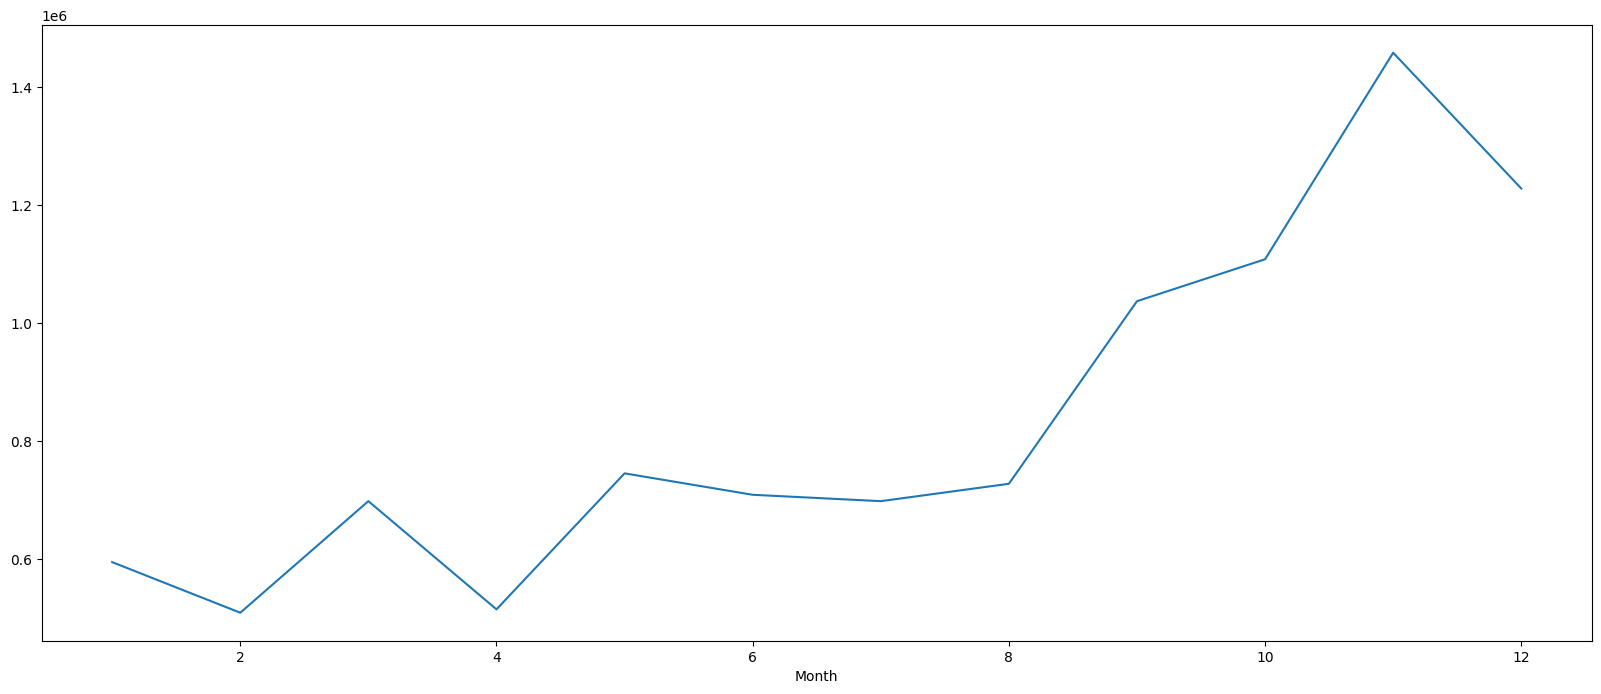

In [132]:
plt.figure(figsize=(20, 8))
df.groupby('Month').sum()['total_Sales'].plot(kind='line')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\48832125.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').sum()['total_Sales'].plot(kind='bar')


<Axes: xlabel='Month'>

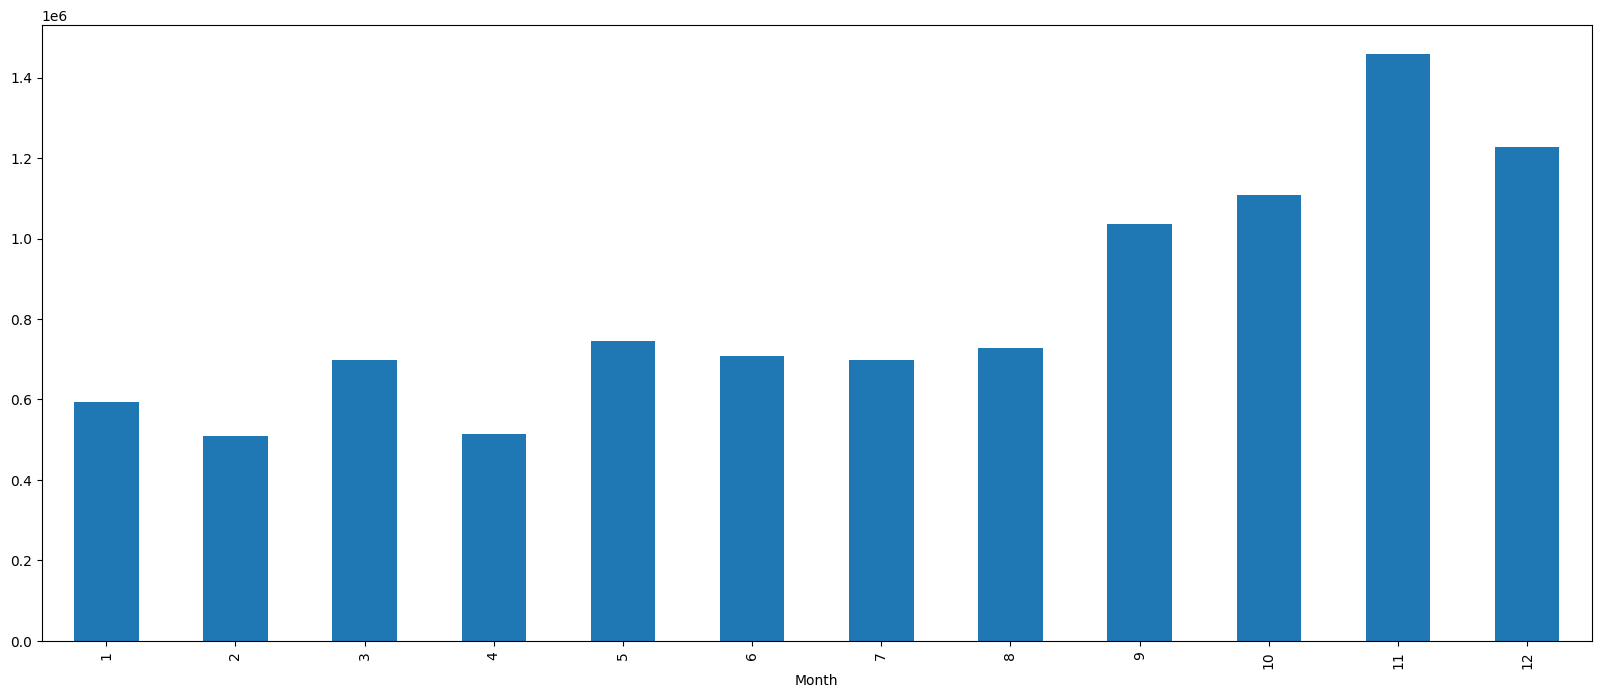

In [133]:
plt.figure(figsize=(20, 8))
df.groupby('Month').sum()['total_Sales'].plot(kind='bar')

In [134]:
# df.groupby('Month').sum()['total_Sales']

**Seasonal Patterns:**

- From the monthly total sales data, there appears to be a noticeable increase in sales during specific months (e.g., November and December). This could be attributed to seasonal factors such as holidays or special promotions during the end-of-year festive season.


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1440461199.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Day').sum()['total_Sales'].plot(kind='line')


<Axes: xlabel='Day'>

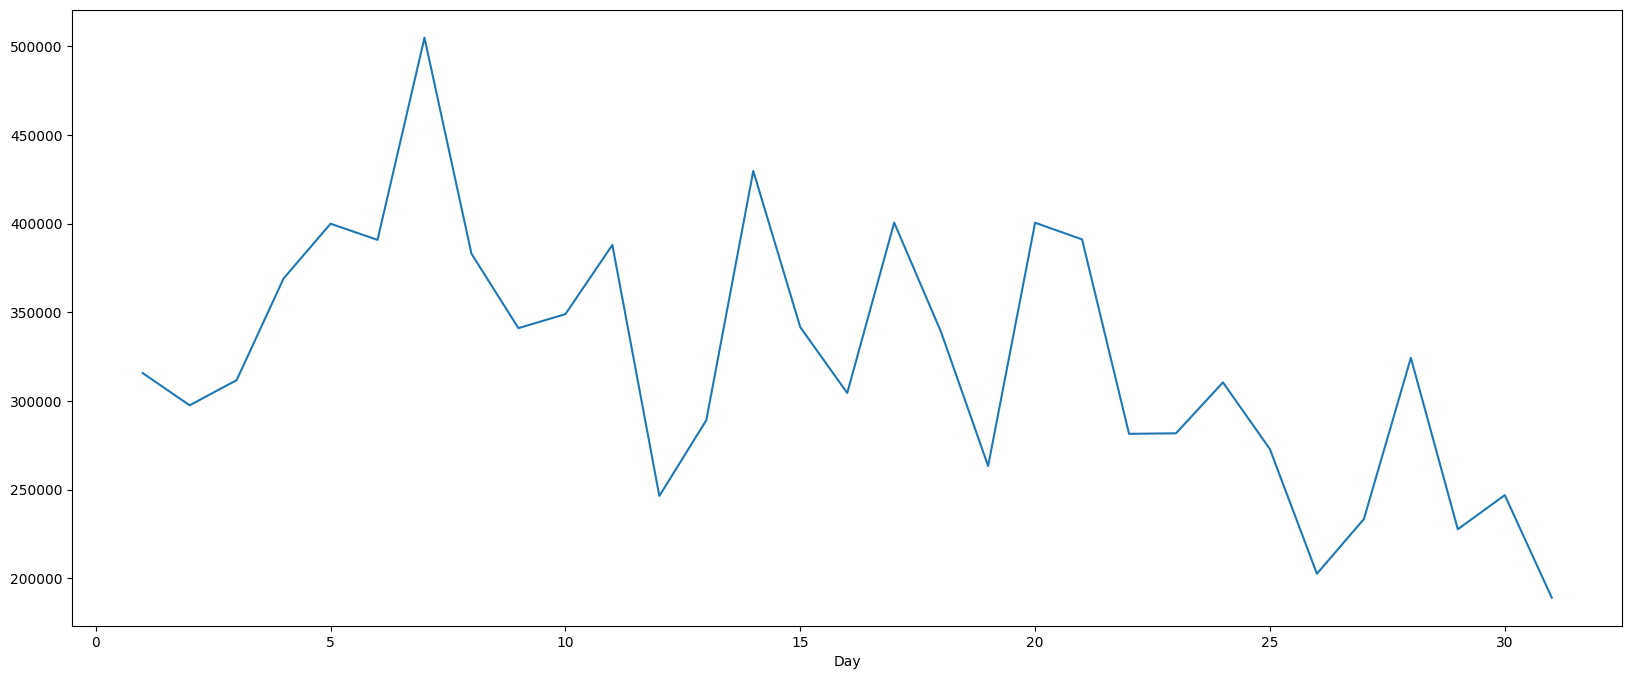

In [135]:
plt.figure(figsize=(20, 8))
df.groupby('Day').sum()['total_Sales'].plot(kind='line')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1028116929.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Day').sum()['total_Sales'].plot(kind='bar')


<Axes: xlabel='Day'>

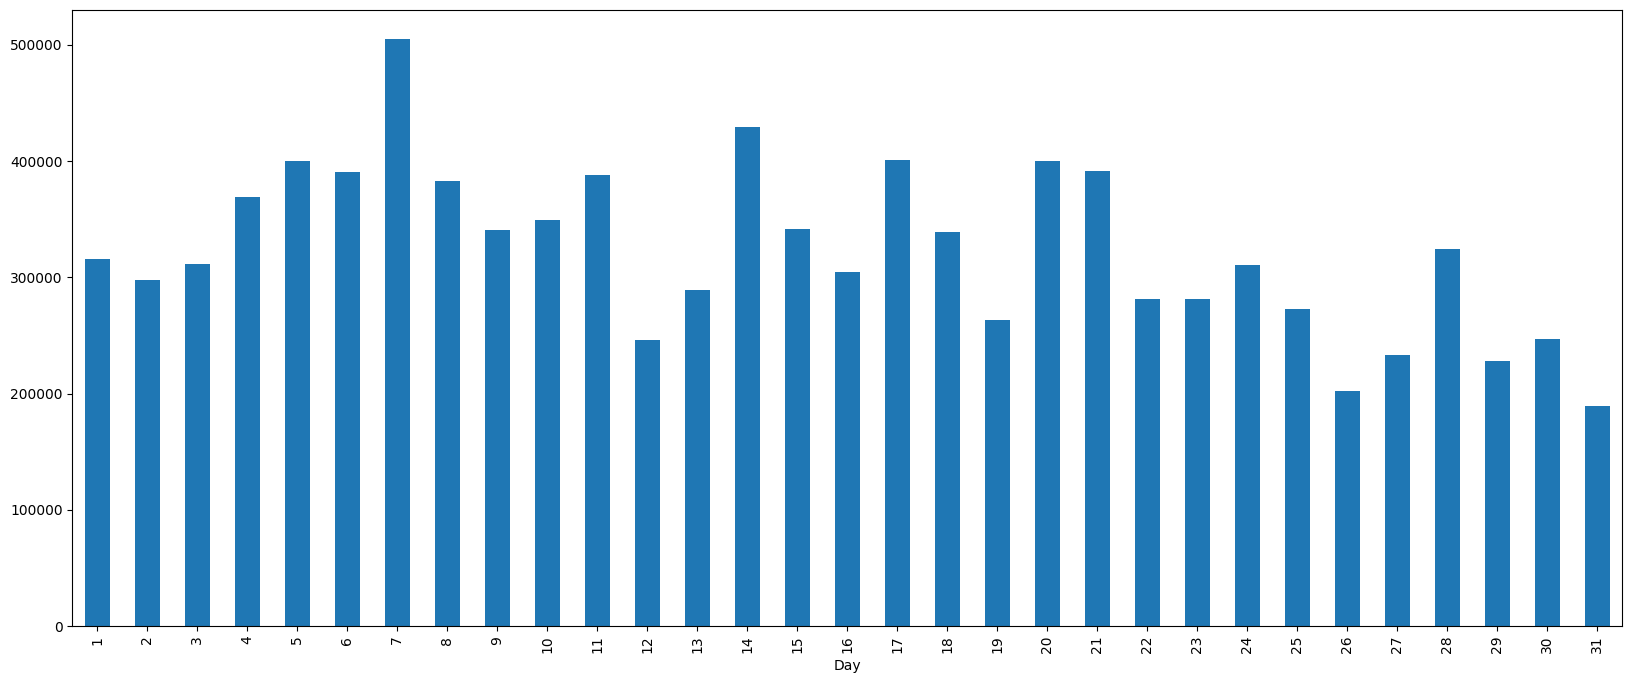

In [136]:
plt.figure(figsize=(20, 8))
df.groupby('Day').sum()['total_Sales'].plot(kind='bar')

In [137]:
# df.groupby('Day').sum()['total_Sales']

**Peak Sales Days:**

- Days 7, 14, and 20 show notably higher total sales compared to other days. These could be considered as peak sales days. Understanding the factors contributing to these peaks, such as promotions or events, may provide insights into customer behavior.

**Low Sales Days:**

- Days 26, 27, 28, 30, and 31 have relatively lower total sales. Investigating the reasons for lower sales on these days, such as holidays or external factors, can help in planning strategies to boost sales during such periods.

**Mid-Month Dip:**

- There is a dip in total sales around the 12th to 15th days of the month (Days 12, 13, 14, and 15). Identifying the cause of this mid-month dip could lead to strategies for maintaining or increasing sales during this period.


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\2934756694.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('DayOfWeek').sum()['total_Sales'].plot(kind='line')


<Axes: xlabel='DayOfWeek'>

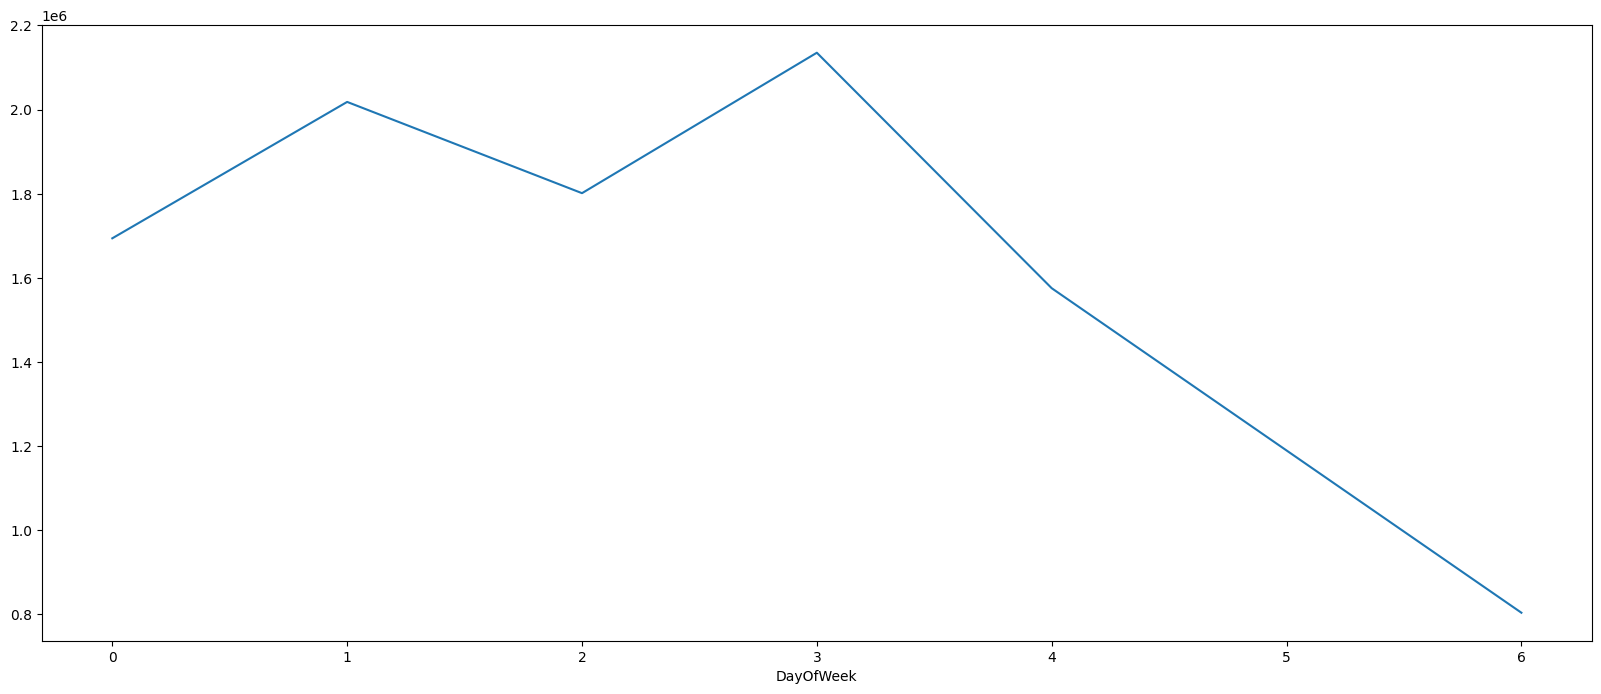

In [138]:
plt.figure(figsize=(20, 8))
df.groupby('DayOfWeek').sum()['total_Sales'].plot(kind='line')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3593761415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('DayOfWeek').sum()['total_Sales'].plot(kind='bar')


<Axes: xlabel='DayOfWeek'>

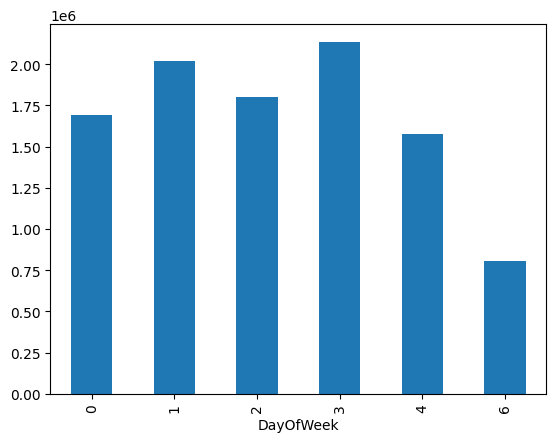

In [139]:
df.groupby('DayOfWeek').sum()['total_Sales'].plot(kind='bar')

In [140]:
# df['InvoiceDate'].dt.day_name()

In [141]:
# df

In [142]:
# df.groupby('DayOfWeek').sum()['total_Sales']

**Overall Observations:**

- The data suggests a clear trend of increasing sales from Monday to Thursday, with Thursday being the peak.
- Friday experiences a decline in total sales, possibly due to the anticipation of the weekend.
- Sunday consistently has the lowest total sales, which is common as it is the last day of the weekend.


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\179547553.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Hour').sum()['total_Sales'].plot(kind='line')


<Axes: xlabel='Hour'>

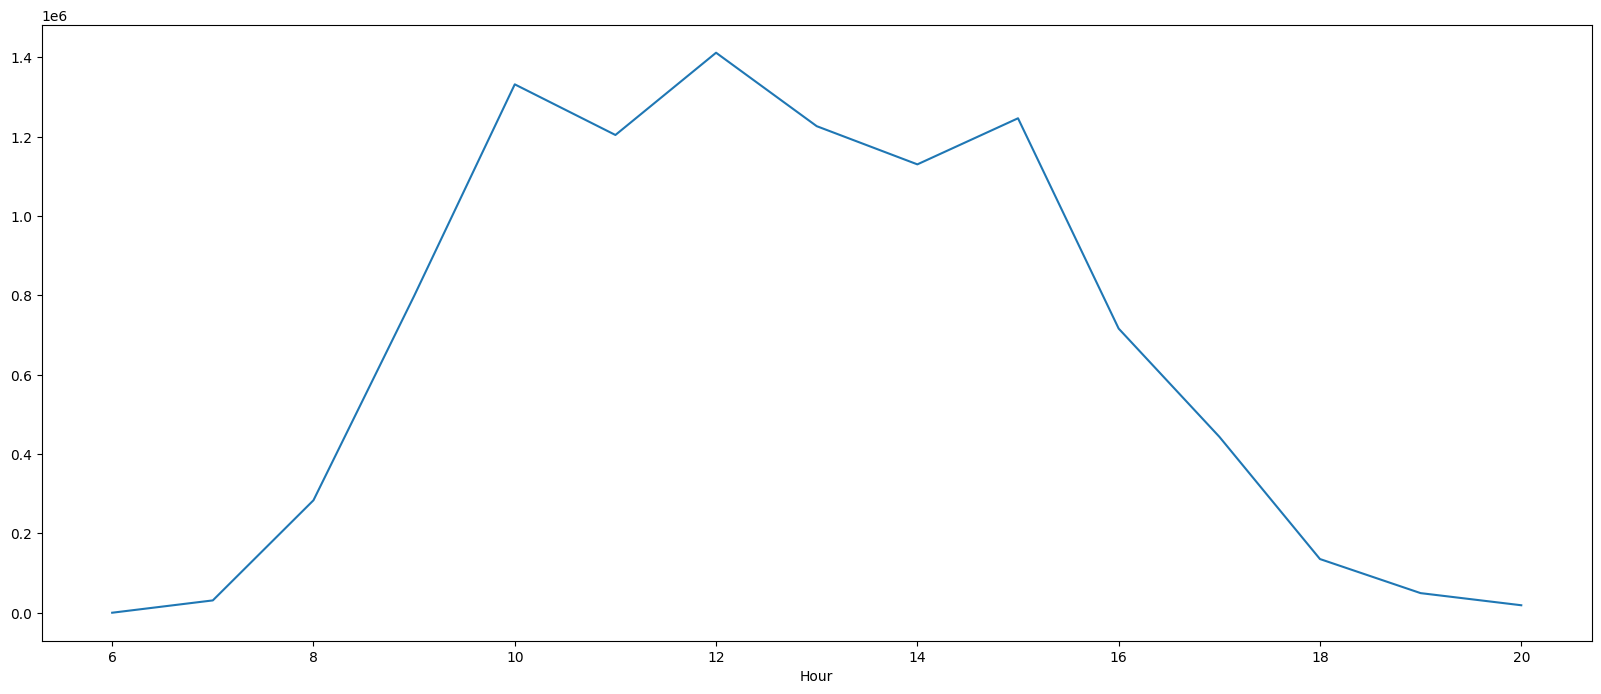

In [143]:
plt.figure(figsize=(20, 8))
df.groupby('Hour').sum()['total_Sales'].plot(kind='line')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\279047922.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Hour').sum()['total_Sales'].plot(kind='bar')


<Axes: xlabel='Hour'>

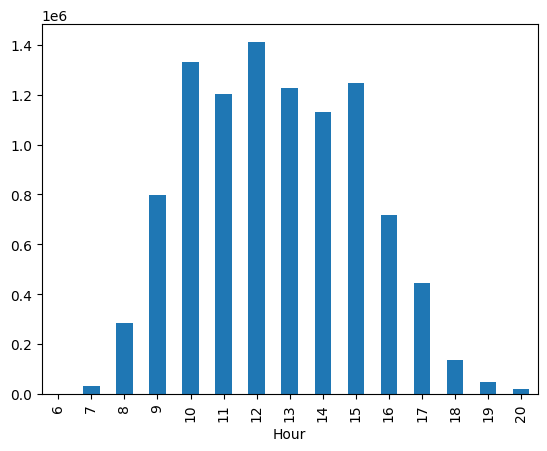

In [144]:
df.groupby('Hour').sum()['total_Sales'].plot(kind='bar')

In [145]:
# df.groupby('Hour').sum()['total_Sales']

**Peak Sales Hours:**

- The data shows a clear pattern of increasing total sales from 6 AM to 3 PM, with a peak around 10 AM. This suggests that late morning is the peak sales period, indicating that customers tend to make more purchases during these hours.

**Afternoon Decline:**

- After the peak hours, total sales start to decline, reaching a lower point in the late afternoon and evening. The decrease in sales during the late afternoon and evening hours could be due to various factors such as customer fatigue, the end of the workday, or other external factors.

**Key Observations:**

- The highest total sales are recorded at 10 AM, suggesting that this specific hour is critical for generating revenue.
- There is a noticeable decline in sales during the late afternoon and evening hours, indicating potential opportunities for targeted marketing or promotions during these times to boost sales.


## we can also make time series forecasting but this out of scope now


### 5)Dashboard


In [146]:
df.to_csv('Data_V2.csv')

<img src="Screenshot 2023-12-22 172308.png" alt="Alternative text" />


### I also created a simple dashboard for non-technical people to get an overview of the data


# Hypothesis Testing

---


I think we don't need to make hypothesis testing in this project


# Data preprocessing

---


### 1)Feature Engineering


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524348 entries, 0 to 524347
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceDate            524348 non-null  datetime64[ns]
 1   Year                   524348 non-null  object        
 2   Month                  524348 non-null  object        
 3   Day                    524348 non-null  object        
 4   Hour                   524348 non-null  object        
 5   DayOfWeek              524348 non-null  object        
 6   InvoiceNo              524348 non-null  object        
 7   StockCode              524348 non-null  object        
 8   Description            524348 non-null  object        
 9   CustomerID             524348 non-null  object        
 10  CusAvgBasketSize       524348 non-null  int64         
 11  CustomerTotalSpending  524348 non-null  float64       
 12  TimeٍٍSinceLastOrder   524348 non-null  int6

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CusAvgBasketSize,524348.0,5162.556241,16638.254006,1.000,491.00,1225.00,2718.00,194515.00
CustomerTotalSpending,524348.0,9174.410004,26884.878666,0.420,1201.51,2427.18,5360.63,275214.02
TimeٍٍSinceLastOrder,524348.0,157.298960,115.841456,0.000,51.00,142.00,256.00,373.00
Quantity,524348.0,10.230357,33.638429,1.000,1.00,4.00,11.00,2000.00
UnitPrice,524348.0,3.378177,5.007023,0.001,1.25,2.08,4.13,169.55
total_Sales,524348.0,19.121268,62.651845,0.001,3.90,9.92,17.70,7144.72


### After analysis mw can now remove any outliers


In [149]:
df_No_outliers = df.copy()

In [150]:
df_No_outliers

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524343,2011-12-09 12:50:00,2011,12,9,12,4,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12680.0,443,862.81,0,France,12,0.85,10.20
524344,2011-12-09 12:50:00,2011,12,9,12,4,581587,22899,CHILDREN'S APRON DOLLY GIRL,12680.0,443,862.81,0,France,6,2.10,12.60
524345,2011-12-09 12:50:00,2011,12,9,12,4,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12680.0,443,862.81,0,France,4,4.15,16.60
524346,2011-12-09 12:50:00,2011,12,9,12,4,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,443,862.81,0,France,4,4.15,16.60


In [151]:
q1_quan_custom = df_No_outliers['Quantity'].quantile(0.25)
q3_quan_custom = df_No_outliers['Quantity'].quantile(0.75)
iqr_quan_custom = q3_quan_custom - q1_quan_custom
H_q = q3_quan_custom + (1.5 * iqr_quan_custom)
L_q = q1_quan_custom - (1.5 * iqr_quan_custom)

q1_unit_custom = df_No_outliers['UnitPrice'].quantile(0.25)
q3_unit_custom = df_No_outliers['UnitPrice'].quantile(0.75)
iqr_unit_custom = q3_unit_custom - q1_unit_custom
H_u = q3_unit_custom + (1.5 * iqr_unit_custom)
L_u = q1_unit_custom - (1.5 * iqr_unit_custom)

In [152]:
L_q

-14.0

In [153]:
H_q

26.0

In [154]:
df_No_outliers = df_No_outliers[~(
    (df_No_outliers['Quantity'] > H_q) | (df_No_outliers['Quantity'] < L_q))]

In [155]:
H_u

8.45

In [156]:
L_u

-3.0700000000000003

In [157]:
df_No_outliers = df_No_outliers[~(
    (df_No_outliers['UnitPrice'] > H_u) | (df_No_outliers['UnitPrice'] < L_u))]

In [158]:
df_No_outliers

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524343,2011-12-09 12:50:00,2011,12,9,12,4,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12680.0,443,862.81,0,France,12,0.85,10.20
524344,2011-12-09 12:50:00,2011,12,9,12,4,581587,22899,CHILDREN'S APRON DOLLY GIRL,12680.0,443,862.81,0,France,6,2.10,12.60
524345,2011-12-09 12:50:00,2011,12,9,12,4,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12680.0,443,862.81,0,France,4,4.15,16.60
524346,2011-12-09 12:50:00,2011,12,9,12,4,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,443,862.81,0,France,4,4.15,16.60


<Axes: xlabel='Quantity', ylabel='total_Sales'>

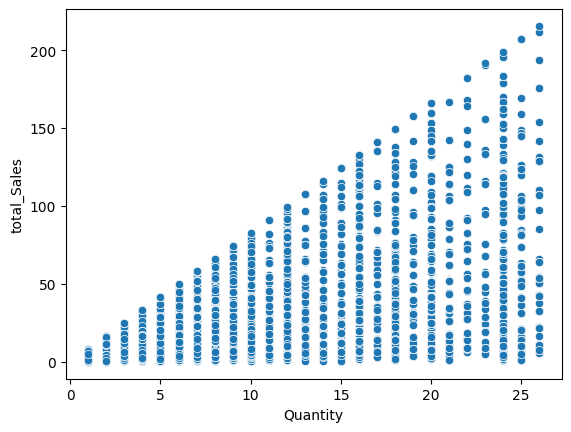

In [159]:
sns.scatterplot(data=df_No_outliers, x='Quantity', y='total_Sales')

In [160]:
X = df_No_outliers.drop(
    ['InvoiceDate', 'InvoiceNo', 'StockCode', 'Description', 'CustomerID'], axis=1)

### 2)Encoding


In [161]:
X

,Year,Month,Day,Hour,DayOfWeek,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales
0,2010,12,1,8,2,1733,5391.21,373,United Kingdom,6,2.55,15.30
1,2010,12,1,8,2,1733,5391.21,373,United Kingdom,6,3.39,20.34
2,2010,12,1,8,2,1733,5391.21,373,United Kingdom,8,2.75,22.00
3,2010,12,1,8,2,1733,5391.21,373,United Kingdom,6,3.39,20.34
4,2010,12,1,8,2,1733,5391.21,373,United Kingdom,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
524343,2011,12,9,12,4,443,862.81,0,France,12,0.85,10.20
524344,2011,12,9,12,4,443,862.81,0,France,6,2.10,12.60
524345,2011,12,9,12,4,443,862.81,0,France,4,4.15,16.60
524346,2011,12,9,12,4,443,862.81,0,France,4,4.15,16.60


In [162]:
X_encoded = pd.get_dummies(X, drop_first=True)

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1603034088.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X , drop_first=True)
C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1603034088.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X , drop_first=True)
C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1603034088.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X , drop_first=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1603034088.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X , drop_first=True)
C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1603034088.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X , drop_first=True)


### 3)split X and y


Not neet to split the data because it is unsupervised learning project


### 4) Scaling


In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [164]:
X_scaled

array([[-0.19316803, -0.09746781,  1.8752508 , ..., -0.01132287,
         0.28889625, -0.02993269],
       [-0.19316803, -0.09746781,  1.8752508 , ..., -0.01132287,
         0.28889625, -0.02993269],
       [-0.19316803, -0.09746781,  1.8752508 , ..., -0.01132287,
         0.28889625, -0.02993269],
       ...,
       [-0.30262271, -0.32494912, -1.34868605, ..., -0.01132287,
        -3.4614503 , -0.02993269],
       [-0.30262271, -0.32494912, -1.34868605, ..., -0.01132287,
        -3.4614503 , -0.02993269],
       [-0.30262271, -0.32494912, -1.34868605, ..., -0.01132287,
        -3.4614503 , -0.02993269]])

### 5)Dimensionality redaction


In [165]:
from sklearn.decomposition import PCA

In [166]:
pca_model = PCA(n_components=5)
X_PCA = pca_model.fit_transform(X_scaled)

In [167]:
X_PCA

array([[-0.22910363,  4.13327271, -0.7692911 ,  1.01959776, -0.90385129],
       [-0.16477783,  4.16522387, -0.86289837,  0.96394217, -0.91350514],
       [-0.07433857,  4.14203951, -1.03933636,  1.02005817, -0.94698878],
       ...,
       [ 1.5741542 ,  1.09179151, -3.25660218,  3.28568111, -0.3226736 ],
       [ 1.5741542 ,  1.09179151, -3.25660218,  3.28568111, -0.3226736 ],
       [ 1.51147967,  1.11580968, -3.13218291,  3.22950396, -0.29703249]])

In [168]:
pca_model.explained_variance_ratio_.sum()

0.10124835915742872

In this instance, selecting the 5 principal components will yield a result greater than 10%, but those four principal components will separate the data well as we see in the scatter plot


In [169]:
pca_model.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4'], dtype=object)

In [170]:
df_pca = pd.DataFrame(X_PCA, columns=pca_model.get_feature_names_out())

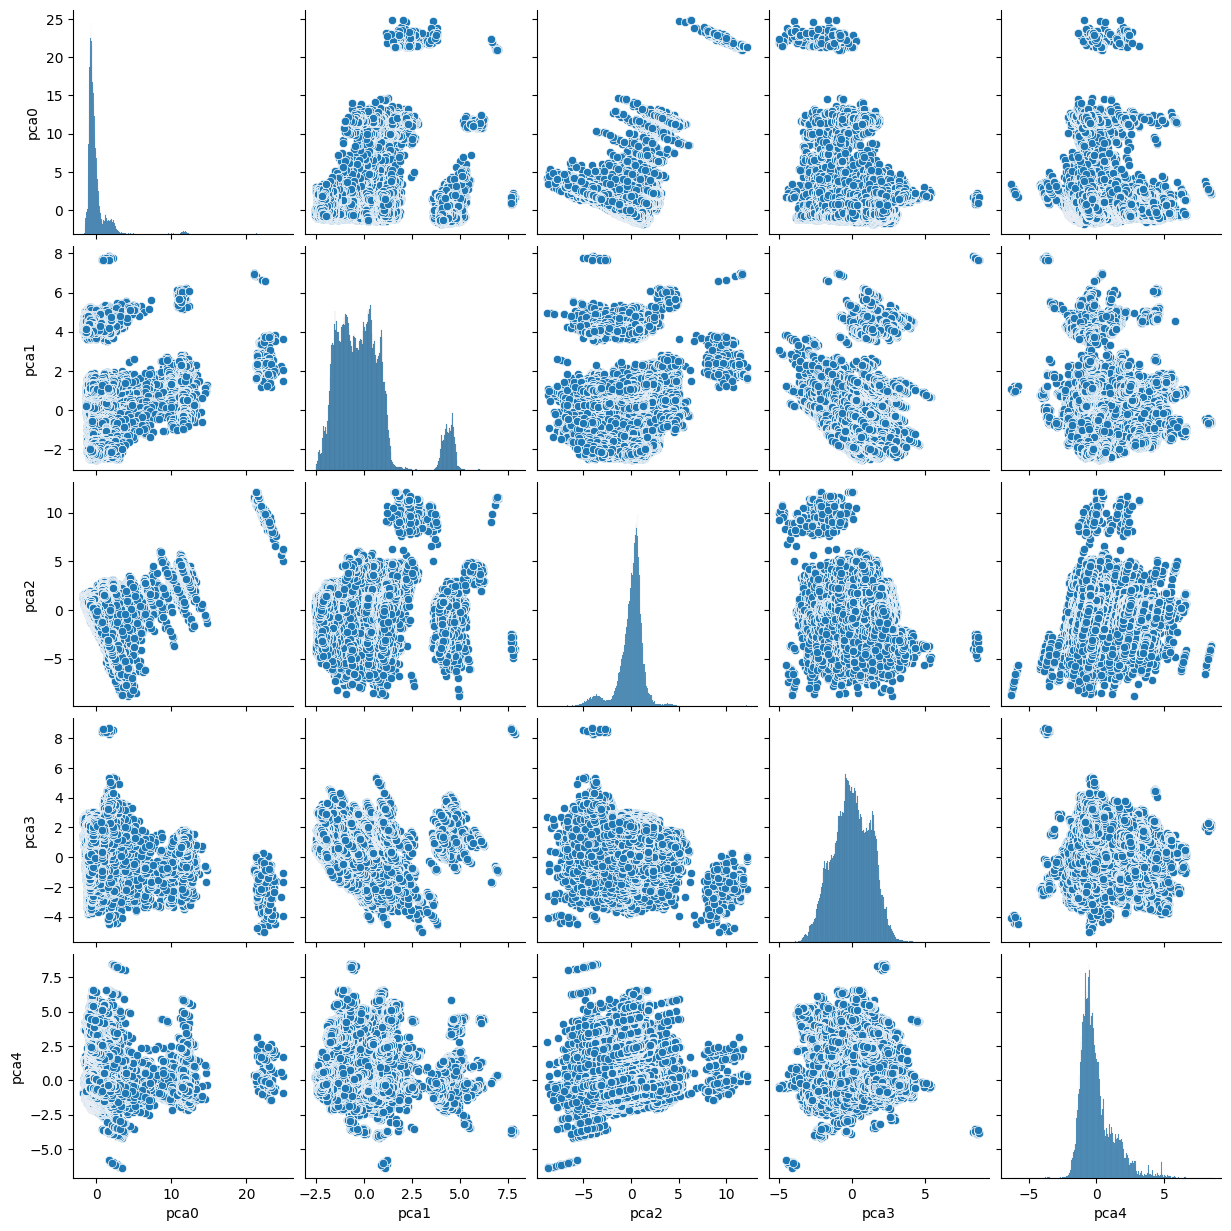

In [171]:
sns.pairplot(df_pca)

<Axes: >

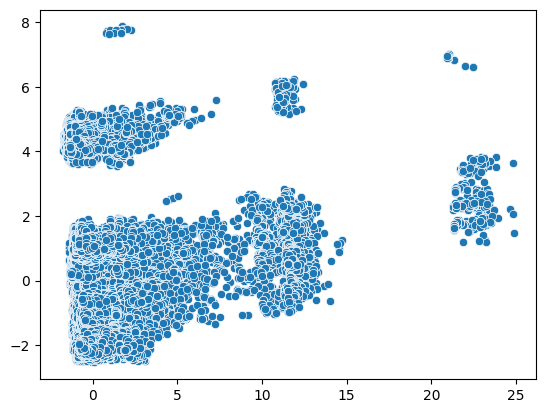

In [172]:
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1])

<Axes: xlabel='pca0', ylabel='Count'>

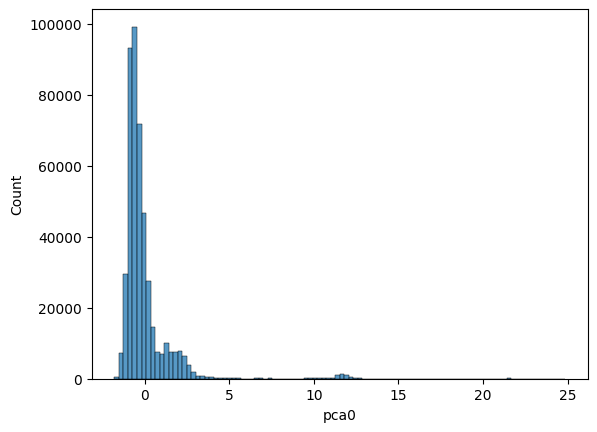

In [173]:
sns.histplot(df_pca['pca0'], bins=100)

<Axes: xlabel='pca1', ylabel='Count'>

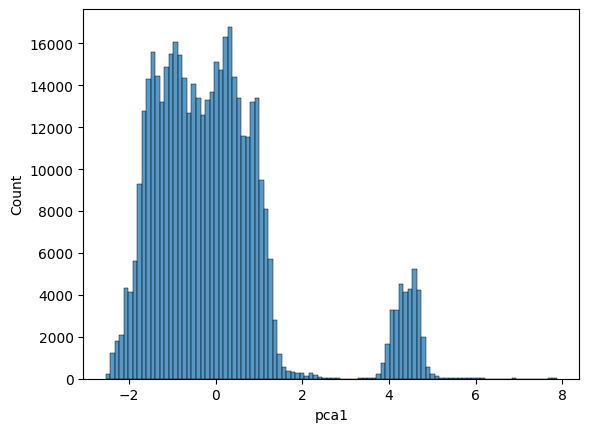

In [174]:
sns.histplot(df_pca['pca1'], bins=100)

# Modeling

---


### 1)choose model


In this project, we are able to forecast for customer segmentation.

K-means will be used to segment our customer base.


### 2)Train the model


In [175]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init='auto')
clusters = model.fit_predict(df_pca)

In [176]:
pd.DataFrame(clusters).value_counts()

0    419082
2     34644
1      6525
dtype: int64

<Axes: xlabel='pca0', ylabel='pca1'>

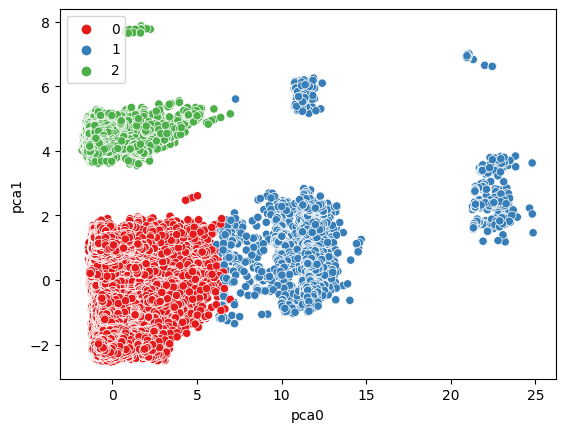

In [177]:
sns.scatterplot(x=df_pca['pca0'], y=df_pca['pca1'],
                hue=clusters, palette='Set1')

### 3)Evaluate the model


In [178]:
inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, n_init='auto')
    model.fit(X_PCA)
    inertia.append(model.inertia_)

inertia

[4846364.4892589105,
 4011075.9735120097,
 3327955.770030469,
 2338102.836627127,
 2149681.0867888522,
 1495646.461606473,
 1403279.8372128713,
 1324414.9663291243,
 1237051.4306371033,
 1150329.6211933233]

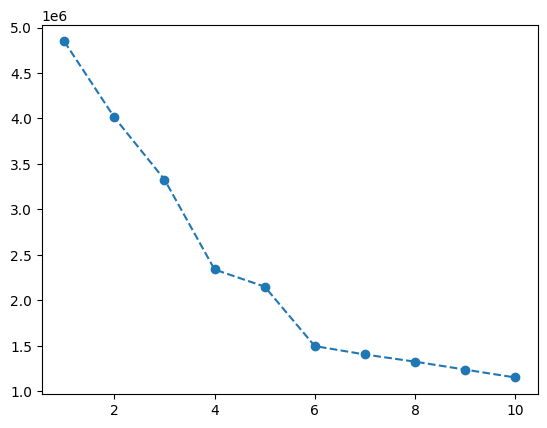

In [179]:
plt.plot(range(1, 11), inertia, '--o')

### 4)hyperparameter tuning


In [180]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, n_init='auto')
clusters = model.fit_predict(X_PCA)

In [181]:
pd.DataFrame(clusters).value_counts()

1    166542
3    148765
0     73873
4     36725
2     34346
dtype: int64

<Axes: xlabel='pca0', ylabel='pca1'>

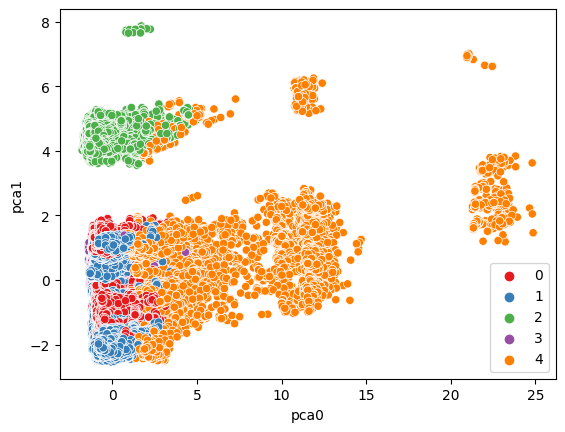

In [182]:
sns.scatterplot(x=df_pca['pca0'], y=df_pca['pca1'],
                hue=clusters, palette='Set1')

In [188]:
# from sklearn.cluster import DBSCAN
# dbscan_model = DBSCAN(eps=1,min_samples=8)
# clusters = dbscan_model.fit_predict(X_PCA)

In [183]:
df_No_outliers['clusters'] = clusters
df_No_outliers

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales,clusters
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30,2
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34,2
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00,2
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34,2
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524343,2011-12-09 12:50:00,2011,12,9,12,4,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12680.0,443,862.81,0,France,12,0.85,10.20,4
524344,2011-12-09 12:50:00,2011,12,9,12,4,581587,22899,CHILDREN'S APRON DOLLY GIRL,12680.0,443,862.81,0,France,6,2.10,12.60,4
524345,2011-12-09 12:50:00,2011,12,9,12,4,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12680.0,443,862.81,0,France,4,4.15,16.60,4
524346,2011-12-09 12:50:00,2011,12,9,12,4,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,443,862.81,0,France,4,4.15,16.60,4


In [189]:
# sns.scatterplot(data=df_No_outliers , x='TimeٍٍSinceLastOrder' , y='total_Sales' , hue='clusters' , palette='Set1')

### 5) final evaluation


### 6)Interpretation of model parameters


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3404281275.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_No_outliers.groupby('clusters').mean()['total_Sales'].plot(kind='bar')


<Axes: xlabel='clusters'>

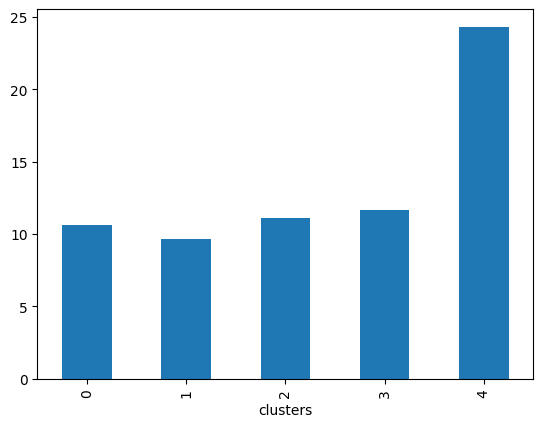

In [196]:
df_No_outliers.groupby('clusters').mean()['total_Sales'].plot(kind='bar')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3953373898.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_No_outliers.groupby('clusters').mean()['TimeٍٍSinceLastOrder'].plot(kind='bar')


<Axes: xlabel='clusters'>

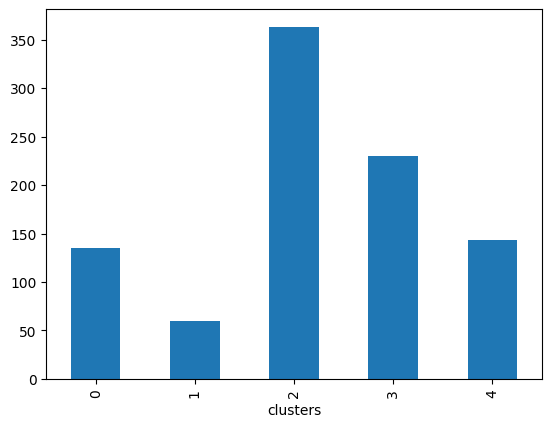

In [198]:
df_No_outliers.groupby('clusters').mean()[
    'TimeٍٍSinceLastOrder'].plot(kind='bar')

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\1628695073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_No_outliers.groupby('clusters').mean()['CusAvgBasketSize'].plot(kind='bar')


<Axes: xlabel='clusters'>

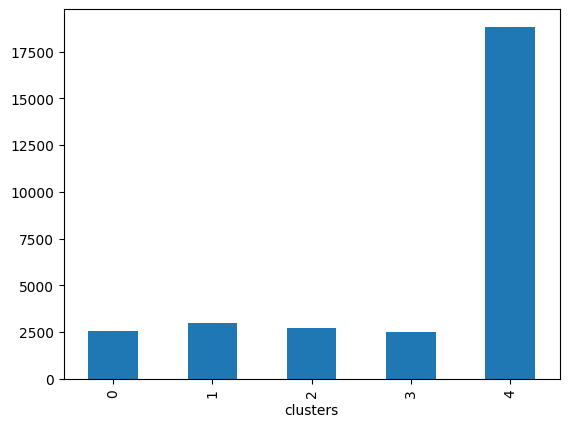

In [201]:
df_No_outliers.groupby('clusters').mean()['CusAvgBasketSize'].plot(kind='bar')

In [199]:
df_No_outliers.groupby('clusters').mean().reset_index()

C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\2906015406.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_No_outliers.groupby('clusters').mean().reset_index()


,clusters,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Quantity,UnitPrice,total_Sales
0,0,2571.120288,4920.350695,134.786566,5.723146,2.635028,10.654721
1,1,2994.899845,5866.554269,59.597015,5.528539,2.403004,9.631017
2,2,2725.816165,5394.930968,363.329587,5.114540,2.832821,11.101470
3,3,2498.031997,4491.900579,229.914173,6.000988,2.762408,11.651267
4,4,18828.541865,32138.229493,143.022845,11.801852,2.536396,24.316306


### Cluster Profiling

- Cluster 4 represents high-value customers with large basket sizes and significant spending.
- Cluster 1 consists of customers with high spending and frequent orders.
- Cluster 2 has customers with longer time intervals between orders.
- Cluster 3 includes customers with moderate spending and order frequency.
- Cluster 0 represents a middle-ground in terms of spending and order frequency.


### Cluster Names:

1. **Cluster 0: The Steady Shoppers**

   - Moderate spending and basket size.
   - Relatively frequent orders.
   - Average quantity and unit price.

2. **Cluster 1: The Active Spenders**

   - Higher spending and basket size compared to Cluster 0.
   - Very frequent orders with a short time since the last order.
   - Similar average quantity but slightly lower unit price.

3. **Cluster 2: The Patient Shoppers**

   - Similar spending and basket size as Cluster 0.
   - Much longer time since the last order.
   - Moderate quantity and higher unit price.

4. **Cluster 3: The Balanced Buyers**

   - Lower spending and basket size.
   - Moderate frequency of orders.
   - Higher quantity and unit price compared to other clusters.

5. **Cluster 4: The Big Spenders**
   - Very high spending and basket size.
   - Frequent orders with a moderate time since the last order.
   - Extremely high quantity and the highest unit price among clusters.


In [203]:
df_No_outliers['Cluster_Name'] = df_No_outliers['clusters'].map({
    0: 'The Steady Shoppers',
    1: 'The Active Spenders',
    2: 'The Patient Shoppers',
    3: 'The Balanced Buyers',
    4: 'The Big Spenders'
})

In [204]:
df_No_outliers

,InvoiceDate,Year,Month,Day,Hour,DayOfWeek,InvoiceNo,StockCode,Description,CustomerID,CusAvgBasketSize,CustomerTotalSpending,TimeٍٍSinceLastOrder,Country,Quantity,UnitPrice,total_Sales,clusters,Cluster_Name
0,2010-12-01 08:26:00,2010,12,1,8,2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,1733,5391.21,373,United Kingdom,6,2.55,15.30,2,The Patient Shoppers
1,2010-12-01 08:26:00,2010,12,1,8,2,536365,71053,WHITE METAL LANTERN,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34,2,The Patient Shoppers
2,2010-12-01 08:26:00,2010,12,1,8,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,1733,5391.21,373,United Kingdom,8,2.75,22.00,2,The Patient Shoppers
3,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34,2,The Patient Shoppers
4,2010-12-01 08:26:00,2010,12,1,8,2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,1733,5391.21,373,United Kingdom,6,3.39,20.34,2,The Patient Shoppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524343,2011-12-09 12:50:00,2011,12,9,12,4,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12680.0,443,862.81,0,France,12,0.85,10.20,4,The Big Spenders
524344,2011-12-09 12:50:00,2011,12,9,12,4,581587,22899,CHILDREN'S APRON DOLLY GIRL,12680.0,443,862.81,0,France,6,2.10,12.60,4,The Big Spenders
524345,2011-12-09 12:50:00,2011,12,9,12,4,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12680.0,443,862.81,0,France,4,4.15,16.60,4,The Big Spenders
524346,2011-12-09 12:50:00,2011,12,9,12,4,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,443,862.81,0,France,4,4.15,16.60,4,The Big Spenders


C:\Users\xobed\AppData\Local\Temp\ipykernel_13948\3055776536.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_No_outliers.groupby('Cluster_Name').mean()['TimeٍٍSinceLastOrder'].plot(kind='pie')


<Axes: ylabel='TimeٍٍSinceLastOrder'>

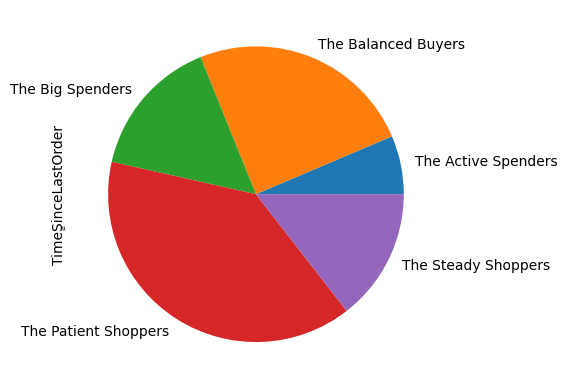

In [209]:
df_No_outliers.groupby('Cluster_Name').mean()[
    'TimeٍٍSinceLastOrder'].plot(kind='pie')

### Personalization and Recommendations:

1. **The Steady Shoppers (Cluster 0):**

   - **Personalization:** Offer loyalty programs or exclusive discounts for frequent purchases.
   - **Recommendations:** Suggest related products or bundle deals to encourage higher basket sizes.
   - **Communication Channel:** Utilize email newsletters for regular updates on new arrivals or special offers.

2. **The Active Spenders (Cluster 1):**

   - **Personalization:** Provide time-sensitive promotions to capitalize on their frequent buying behavior.
   - **Recommendations:** Offer cross-sell or up-sell suggestions during the checkout process.
   - **Communication Channel:** Use SMS or app notifications for flash sales or limited-time offers.

3. **The Patient Shoppers (Cluster 2):**

   - **Personalization:** Implement targeted re-engagement campaigns with incentives.
   - **Recommendations:** Recommend premium or exclusive products to justify longer purchase intervals.
   - **Communication Channel:** Utilize personalized emails with product highlights and recommendations.

4. **The Balanced Buyers (Cluster 3):**

   - **Personalization:** Provide tiered discounts based on order frequency and value.
   - **Recommendations:** Offer product bundles or discounts on complementary items.
   - **Communication Channel:** Employ a mix of email and social media for a balanced approach.

5. **The Big Spenders (Cluster 4):**
   - **Personalization:** Offer VIP treatment, early access to sales, or exclusive events.
   - **Recommendations:** Provide high-end product suggestions and limited-edition releases.
   - **Communication Channel:** VIP newsletters and personalized account managers for a premium experience.

### Interpretation and Insights:

1. **Targeted Marketing:**

   - Tailoring marketing strategies to each cluster ensures more effective communication.
   - Understanding customer behavior allows for targeted advertising and promotions.

2. **Customer Retention:**

   - Personalized experiences enhance customer loyalty and satisfaction.
   - Targeting specific needs of each cluster helps in retaining diverse customer segments.

3. **Inventory Management:**

   - Efficient inventory management based on cluster preferences prevents overstock or stockouts.
   - Timely promotions on slow-moving items for specific clusters can optimize inventory turnover.

4. **Optimizing Resources:**
   - Allocating marketing resources based on cluster importance and potential ROI.
   - Focusing efforts on high-value clusters can yield better results in customer acquisition and retention.
